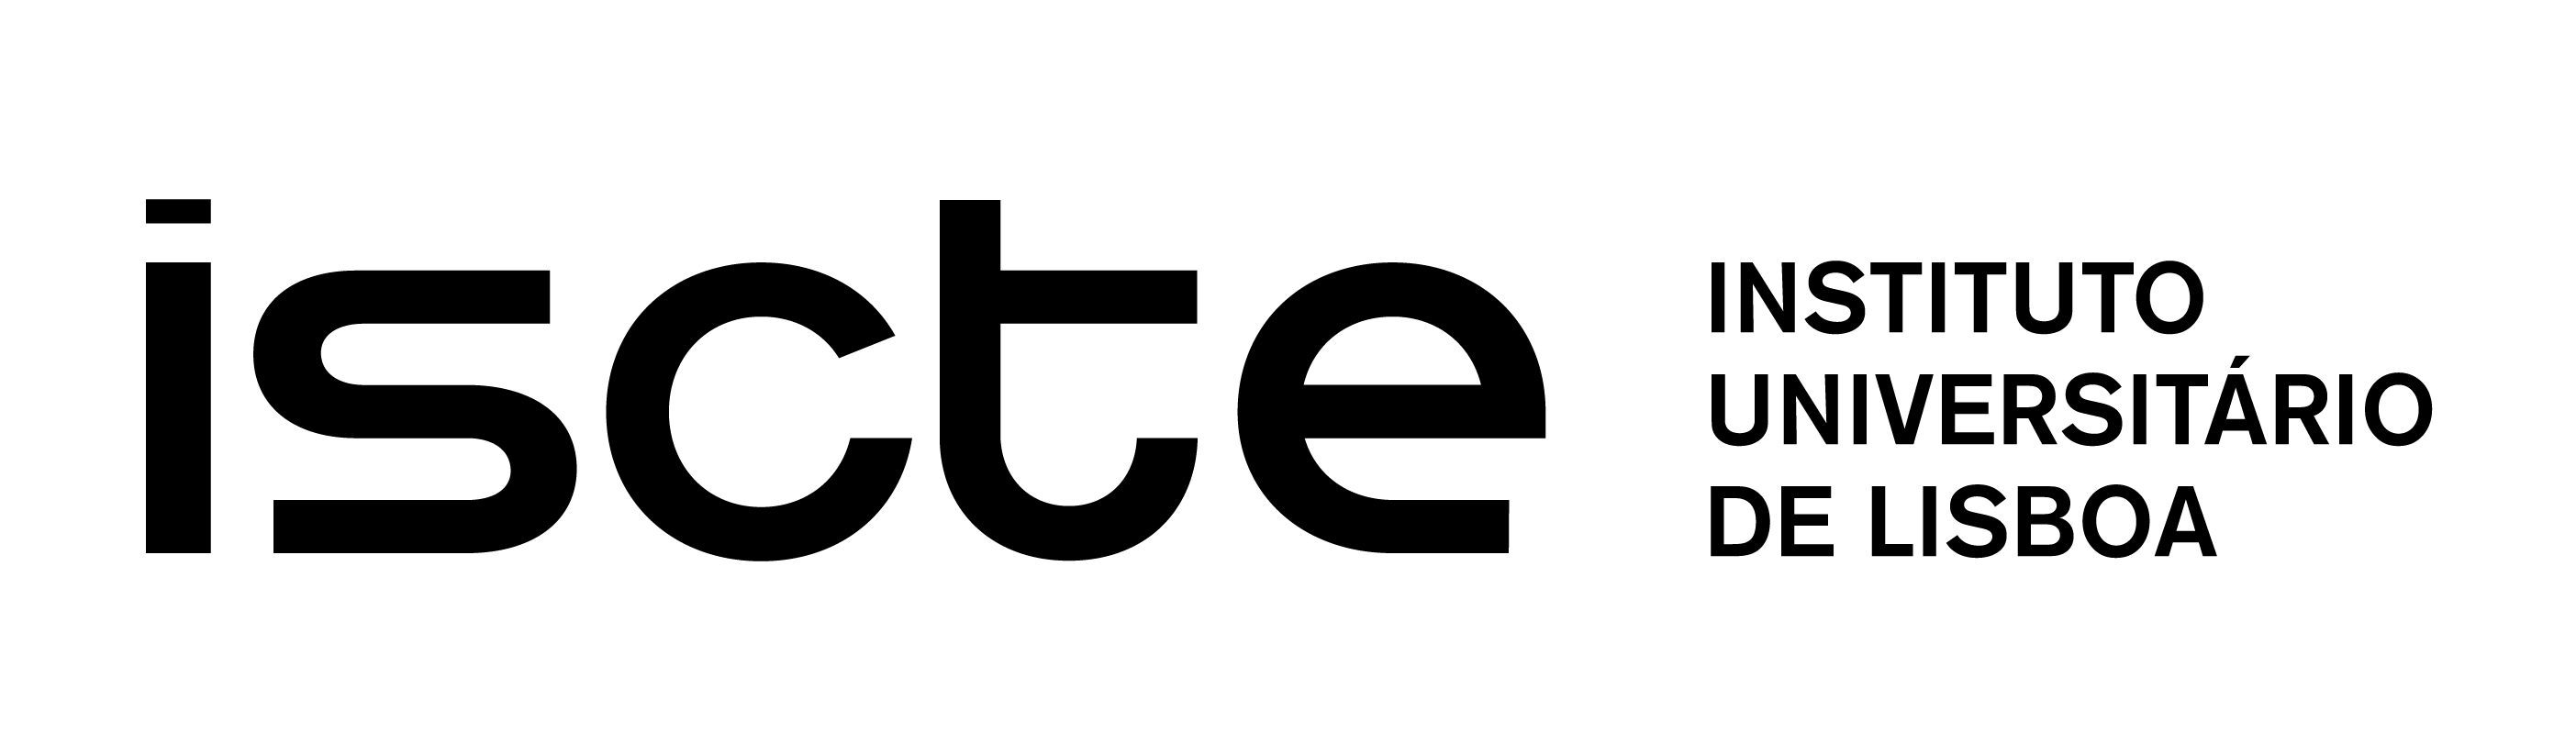

#           1ºSemestre Ano Letivo 2022/2023
#                    Unidade Curricular de Introdução a Modelos Dinâmicos
# Docente Diana Aldea Mendes

# ---------------------------------Airbnbs em Edinburg-----------------------------------------------

#### Grupo 5: 
- Eliane Susso Efraim Gabriel, Nº 103303
- Marco Delgado Esperança, Nº 110451
- Maria João Ferreira Lourenço, Nº 104716
- Umeima Adam Mahomed, Nº99239

####                                                   Lisboa, 18 de dezembro de 2022

In [279]:
# bibliotecas
library(olsrr)
library(car)      # bases de dados e gráficos
library(lmtest)   # testes de hipótese sobre os pressupostos dos resíduos
library(tseries)  # teste de Jarque-Bera
library(ggplot2)  # gráficos
library(tidyr)    # data-frames
library(MASS)     # estatística, bases de dados, regressão
library(Metrics)  # calcular o erro entre dois vetores numéricos

# Pré-processamento e análise dos dados

#### Descrição  da base de dados: Edinburg 

- **id**: identificador único de cada Airbnb;

- **name**: breve descrição com características do Airbnb;

- **host_id**: identificação numérica única do anfitrão;

- **host_name**: nome próprio do anfitrião;

- **neighbourhood_group**: vazio, após a limpeza, mas deve agrupar bairros individuais num conjunto maior de bairros; 

- **neighbourhood**: bairro a que o Airbnb pertence;

- **latitude**: distância ao Equador, medida ao longo do Meridiano de Greenwich, associada ao Norte e ao Sul, medida em graus e varia de 0º a 90º;

- **longitude**: distância ao Meridiano de Greenwich medida ao longo do Equador, associada ao Este e Oeste, medida em graus e  varia de 0º a 180º;

- **room_type**: tipos de alojamentos, por exemplo se é apartamento ou hotel, se é o apartamento inteiro ou um quarto privado ou partilhado;

- **price**: preço do alojamento, provavelmente por noite e em libras (moeda utilizada em Edinburg);;

- **minimum_nights**: número mínimo de noites a ficar alojado no Airbnb;

- **number_of_reviews**: número de avaliações do alojamento;

- **last_review**: data da última avaliação;

- **reviews_per_month**: média das avaliações mensais;

- **calculated_host_listing_count**: número de anfitriões profissionais, presentes numa listagem ligada a um Airbnb específico;

- **availability_365**: quantas noites por ano o Airbnb está disponível;

- **number_of_reviews_ltm**: número de avaliações no último ano/12 meses; 

- **license**: vazio antes e após a limpeza, mas deve estar relacionado com a licença de alugamento necessária a um aluguer correto e legal.

In [280]:
# importação do ficheiro csv
dados <- read.csv('Edinburg.csv', sep=";", encoding="UTF-8")

In [281]:
# Visualizar as primeiras 6 linhas do data frame
head(dados)

X.U.FEFF.id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
31523141,Cosy. comfy. entire house. 2 bedrooms and sleeps 6,942783,Jo,NA,Gilmerton South and the Murrays,55.88566,-3.08646,Entire home/apt,105,3,45,06/08/2022,1.06,1,259,12,NA
16612439,Old Manse luxury studio apartment near Edinburgh,69412742,Linda,NA,Gilmerton South and the Murrays,55.91416,-3.08876,Entire home/apt,85,3,32,19/09/2020,0.51,1,70,0,NA
30558669,Large Double Room in Shared Flat with Sea View,115744740,Calum,NA,Trinity East and The Dudleys,55.98065,-3.19888,Private room,46,2,87,28/08/2022,2.11,1,193,49,NA
53955119,Esk Lodge with River View at Kevock Vale Park,436998879,Valerie,NA,Gilmerton South and the Murrays,55.88203,-3.11861,Private room,140,1,0,,NA,3,9,0,NA
"5,99E+17",George Avenue - 1 bed shared bathroom,452973676,Robbie,NA,Gilmerton South and the Murrays,55.87941,-3.15327,Private room,45,1,17,25/08/2022,3.42,1,356,17,NA
42501468,Private-access room and shower room near Edinburgh,165421613,Sheila,NA,Gilmerton South and the Murrays,55.87221,-3.15093,Private room,40,1,30,02/09/2022,1.41,1,123,28,NA


In [282]:
# número de observações e número de variáveis
dim(dados)

[1] 7833   18

Temos 7833 observações e 18 variáveis.

In [283]:
# estrutura dos dados
str(dados)

'data.frame':	7833 obs. of  18 variables:
 $ X.U.FEFF.id                   : Factor w/ 5890 levels "","10009543",..: 2509 679 2414 5168 4486 3810 563 1673 3436 3923 ...
 $ name                          : Factor w/ 7615 levels "","'A great flat'",..: 2513 5397 4166 3314 3555 5583 3562 2280 3056 571 ...
 $ host_id                       : int  942783 69412742 115744740 436998879 452973676 165421613 60423 46498 165635 192586 ...
 $ host_name                     : Factor w/ 2070 levels "","<U+4E00><U+5578>","<U+6606>",..: 930 1143 301 1973 1616 1766 351 725 1955 1541 ...
 $ neighbourhood_group           : logi  NA NA NA NA NA NA ...
 $ neighbourhood                 : Factor w/ 111 levels "Abbeyhill","Baberton and Juniper Green",..: 45 45 108 45 45 45 83 16 58 65 ...
 $ latitude                      : num  55.9 55.9 56 55.9 55.9 ...
 $ longitude                     : num  -3.09 -3.09 -3.2 -3.12 -3.15 ...
 $ room_type                     : Factor w/ 5 levels "","Entire home/apt",..: 2 2 4 4 4

A nossa base de dados têm 18 variáveis distintas, cada uma com 7833 observações. Podemos ainda concluir que existem variáveis com valores de NA, o que mostra a existência de missing data, inclusive duas variáveis completamente nulas. Temos 6 variáveis categóricas, identificadas por Factor.

In [284]:
library(visdat)

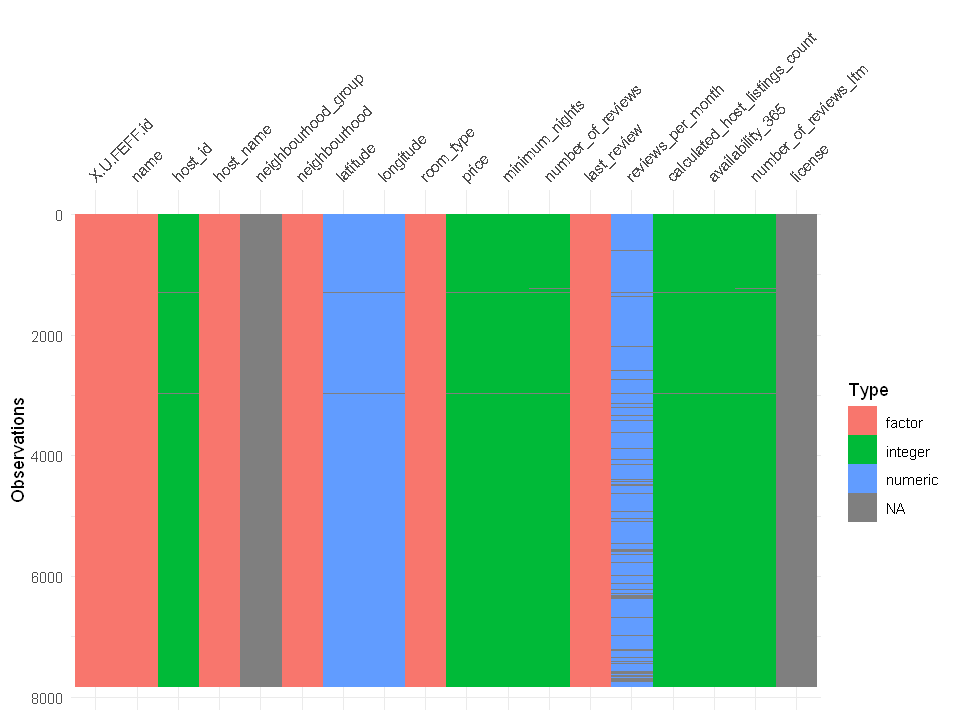

In [285]:
# visualização gráfica do tipo de dados e NA
options(repr.plot.width=8, repr.plot.height=6)

visdat::vis_dat(dados,sort_type = FALSE)

Temos dados numéricos e categóricos e muitos valores NA, inclusive 2 variáveis completamente vazias na nosa base de dados inicial.

In [286]:
# usamos o comando "summary" para ver quantas observações faltam em cada uma das variáveis
summary(dados)

   X.U.FEFF.id  
 6,33E+17:  74  
 6,75E+17:  44  
 6,31E+17:  39  
 6,69E+17:  37  
 6,28E+17:  36  
 6,56E+17:  35  
 (Other) :7568  
                                                                         name     
 <U+2600><U+2654>Very Nice Room Near Montgomery Street Park<U+2654><U+2600>: 103  
                                                                           :  15  
 ¤<U+272A>Trendy Studio Near Montgomery Street Park<U+272A>¤               :   8  
 <U+2764><U+272F>Bright Studio Near Pilrig Park<U+272F><U+2764>            :   8  
 Mono Suites - One Bedroom Suite                                           :   7  
 Ben Cruachan Guesthouse                                                   :   5  
 (Other)                                                                   :7687  
    host_id            host_name    neighbourhood_group
 Min.   :    46498   Altido : 153   Mode:logical       
 1st Qu.: 22597535   Teodora: 123   NA's:7833          
 Median : 73130543   David  : 11

Na última linha de cada grupo temos os NA's (missing data) e como podemos observar quase todas as variáveis os têm. Por exemplo, a variável review_per_month tem 822 NA's e a variável availability_365 tem 15 NA's. Também podemos observar, o valor mínimo e máximo de cada variável, o que pode indiciar a existência de outliers/valores extremos (valores muito diferentes da média, que também é possível observar, onde diz "Mean"). Por exemplo, na variável price, o valor máximo é 20551 e a média é de 183.

# Limpeza dos dados em R

In [287]:
### Fase 2
# Eliminar a coluna id,neighbourhood_group e license
dados  <-  dados[-c(1, 5,18)]
head(dados)

name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
Cosy. comfy. entire house. 2 bedrooms and sleeps 6,942783,Jo,Gilmerton South and the Murrays,55.88566,-3.08646,Entire home/apt,105,3,45,06/08/2022,1.06,1,259,12
Old Manse luxury studio apartment near Edinburgh,69412742,Linda,Gilmerton South and the Murrays,55.91416,-3.08876,Entire home/apt,85,3,32,19/09/2020,0.51,1,70,0
Large Double Room in Shared Flat with Sea View,115744740,Calum,Trinity East and The Dudleys,55.98065,-3.19888,Private room,46,2,87,28/08/2022,2.11,1,193,49
Esk Lodge with River View at Kevock Vale Park,436998879,Valerie,Gilmerton South and the Murrays,55.88203,-3.11861,Private room,140,1,0,,NA,3,9,0
George Avenue - 1 bed shared bathroom,452973676,Robbie,Gilmerton South and the Murrays,55.87941,-3.15327,Private room,45,1,17,25/08/2022,3.42,1,356,17
Private-access room and shower room near Edinburgh,165421613,Sheila,Gilmerton South and the Murrays,55.87221,-3.15093,Private room,40,1,30,02/09/2022,1.41,1,123,28


In [288]:
# procura os valores NA de todas as variáveis
apply(is.na(dados),2,which)

$name
integer(0)

$host_id
 [1] 1225 1292 1306 2239 2472 2965 4099 5392 5804 6424 6633 6880 7122 7397 7633

$host_name
integer(0)

$neighbourhood
integer(0)

$latitude
 [1] 1225 1292 2239 2472 2965 4099 5392 5804 6424 6633 6880 7122 7397 7633

$longitude
 [1] 1225 1292 1306 2239 2472 2965 4099 5392 5804 6424 6633 6880 7122 7397 7633

$room_type
integer(0)

$price
 [1] 1225 1292 1306 2239 2472 2965 4099 5392 5804 6424 6633 6880 7122 7397 7633

$minimum_nights
 [1] 1225 1292 1306 2239 2472 2965 4099 5392 5804 6424 6633 6880 7122 7397 7633

$number_of_reviews
 [1] 1225 1226 1292 1293 1306 1307 2239 2240 2472 2473 2965 2966 4099 4100 5392
[16] 5393 5804 5805 6424 6425 6633 6634 6880 6881 7122 7123 7397 7398 7633 7634

$last_review
integer(0)

$reviews_per_month
  [1]    4   42   43   55  222  486  536  579  592  596  597  662  910 1100 1157
 [16] 1225 1292 1306 1358 1395 1532 1538 1609 1618 1682 1881 1937 1974 2051 2186
 [31] 2199 2227 2228 2239 2341 2424 2472 2505 2559 2561 2584 2588 2663 2733 2747
 [46] 2795 2820 2841 2892 2940 2958 2965 2983 3012 3021 3130 3133 3197 3198 3268
 [61] 3311 3325 3329 3334 3350 3351 3352 3353 3354 3358 3360 3361 3405 3412 3464
 [76] 3465 3466 3468 3486 3500 3501 3502 3503 3504 3505 3506 3513 3514 3515 3516
 [91] 3518 3519 3520 3521 3522 3523 3611 3655 3662 3686 3697 3728 3736 3740 3741
[106] 3807 3852 3873 3876 3911 3914 3924 3938 3985 4011 4033 4035 4038 4044 4049
[121] 4050 4058 4099 4102 4130 4140 4141 4143 4144 4146 4148 4149 4150 4169 4171
[136] 4192 4233 4281 4284 4296 4304 4330 4331 4333 4334 4335 4353 4363 4364 4368
[151] 4375 4377 4388 4389 4391 4393 4399 4404 4418 4420 4421 4422 4423 4428 4433
[166] 4435 4457 4460 4472 4487 4488 4491 4497 4501 4507 4508 4509 4510 4537 4545
[181] 4547 4549 4559 4575 4586 4589 4590 4594 4595 4601 4606 4613 4614 4615 4616
[196] 4621 4625 4629 4660 4661 4665 4666 4669 4671 4673 4683 4690 4698 4699 4706
[211] 4725 4731 4747 4750 4773 4788 4804 4811 4812 4813 4814 4824 4833 4845 4855
[226] 4856 4857 4895 4906 4907 4908 4919 4950 4967 4973 4993 4994 5017 5035 5036
[241] 5037 5038 5039 5050 5081 5084 5092 5093 5108 5135 5140 5171 5221 5233 5295
[256] 5298 5356 5371 5381 5392 5425 5426 5445 5447 5449 5450 5451 5452 5472 5473
[271] 5502 5540 5541 5542 5543 5548 5549 5550 5551 5552 5553 5554 5555 5556 5557
[286] 5558 5561 5562 5563 5565 5569 5575 5581 5587 5591 5595 5600 5601 5602 5605
[301] 5606 5607 5609 5611 5612 5613 5616 5617 5622 5623 5624 5625 5630 5631 5632
[316] 5633 5634 5635 5640 5646 5651 5653 5654 5655 5656 5675 5682 5683 5684 5686
[331] 5687 5688 5689 5692 5696 5705 5707 5709 5711 5715 5750 5751 5752 5753 5754
[346] 5755 5756 5758 5759 5760 5762 5763 5764 5765 5766 5769 5773 5790 5804 5831
[361] 5833 5835 5876 5909 5936 5938 5964 5975 5978 5979 5980 5981 6002 6005 6016
[376] 6027 6032 6042 6043 6060 6065 6070 6072 6081 6089 6100 6101 6111 6145 6146
[391] 6148 6155 6157 6166 6186 6190 6193 6202 6204 6205 6207 6208 6210 6211 6212
[406] 6213 6220 6223 6236 6240 6247 6259 6261 6262 6263 6265 6266 6267 6268 6269
[421] 6270 6271 6274 6275 6276 6277 6278 6279 6280 6281 6282 6283 6287 6288 6289
[436] 6302 6304 6305 6306 6307 6308 6309 6310 6311 6312 6313 6314 6315 6316 6317
[451] 6318 6319 6320 6321 6322 6323 6324 6325 6326 6327 6329 6330 6331 6332 6334
[466] 6335 6336 6337 6339 6340 6341 6342 6343 6344 6346 6347 6348 6349 6350 6351
[481] 6352 6354 6355 6356 6357 6358 6359 6360 6361 6362 6364 6365 6366 6367 6368
[496] 6373 6375 6377 6398 6402 6413 6424 6439 6445 6455 6474 6477 6478 6500 6503
[511] 6513 6530 6532 6553 6560 6561 6589 6590 6616 6626 6633 6635 6637 6638 6652
[526] 6656 6660 6674 6678 6682 6712 6721 6730 6731 6740 6771 6772 6782 6789 6839
[541] 6843 6858 6861 6867 6870 6875 6879 6880 6885 6886 6898 6911 6922 6934 6946
[556] 6949 6959 6969 6972 6981 6991 6996 7001 7006 7009 7011 7020 7028 7034 7036
[571] 7054 7061 7070 7073 7078 7079 7112 7113 7115 7122 7130 7131 7140 7144 7146
[586] 7151 7153 7160 7166 7183 7185 7196 7199 7204 7210 7216 7218 7220 72

In [289]:
# calcular a mediana da variável price e substituir esses valores onde está NA

mediana <- median(dados$price,na.rm=TRUE)
mediana

dados$price[which(is.na(dados$price))] <- mediana
summary(is.na(dados$price))

# calcular a mediana da variável minimum_nights e substituir esses valores onde está NA

mediana1 <- median(dados$minimum_nights,na.rm=TRUE)
mediana1

dados$minimum_nights[which(is.na(dados$minimum_nights))] <- mediana1
summary(is.na(dados$minimum_nights))

# calcular a mediana da variável number_of_reviews e substituir esses valores onde está NA

mediana2 <- median(dados$number_of_reviews,na.rm=TRUE)
mediana2

dados$number_of_reviews[which(is.na(dados$number_of_reviews))] <- mediana2
summary(is.na(dados$number_of_reviews))


# calcular a mediana da variável reviews_per_month e substituir esses valores onde está NA

mediana3 <- median(dados$reviews_per_month,na.rm=TRUE)
mediana3

dados$reviews_per_month[which(is.na(dados$reviews_per_month))] <- mediana3
summary(is.na(dados$reviews_per_month))

# calcular a mediana da variável calculated_host_listings_count e substituir esses valores onde está NA

mediana4 <- median(dados$calculated_host_listings_count,na.rm=TRUE)
mediana4

dados$calculated_host_listings_count[which(is.na(dados$calculated_host_listings_count))] <- mediana4
summary(is.na(dados$calculated_host_listings_count))

# calcular a mediana da variável availabilty_365 e substituir esses valores onde está NA

mediana5 <- median(dados$availability_365,na.rm=TRUE)
mediana5

dados$availability_365[which(is.na(dados$availability_365))] <- mediana5
summary(is.na(dados$availability_365))

# calcular a mediana da variável number_of_reviews_ltm e substituir esses valores onde está NA

mediana6 <- median(dados$number_of_reviews_ltm,na.rm=TRUE)
mediana6

dados$number_of_reviews_ltm[which(is.na(dados$number_of_reviews_ltm))] <- mediana6
summary(is.na(dados$number_of_reviews_ltm))

# calcular a mediana da variável longitude e substituir esses valores onde está NA

mediana7 <- median(dados$longitude,na.rm=TRUE)
mediana7

dados$longitude[which(is.na(dados$longitude))] <- mediana7
summary(is.na(dados$longitude))

# calcular a mediana da variável latitude e substituir esses valores onde está NA

mediana8 <- median(dados$latitude,na.rm=TRUE)
mediana8

dados$latitude[which(is.na(dados$latitude))] <- mediana8
summary(is.na(dados$latitude))


# Calcular a moda da variável room_type e substituir esses valores onde está NA

# Substituir as células em branco por na para aplicar !is.na

dados$room_type <- replace(dados$room_type, dados$room_type=='', NA)

# Substituir os NAs de room type por imputação de moda

val1 <- unique(dados$room_type[!is.na(dados$room_type)])                   
moda1 <- val1[which.max(tabulate(match(dados$room_type, val1)))]
dados$room_type[is.na(dados$room_type)] <- moda1


# Calcular a moda da variável last_review e substituir esses valores onde está NA

# Substituir as células em branco por na para aplicar !is.na

dados$last_review <- replace(dados$last_review, dados$last_review=='', NA)

# Substituir os NAs de last_review por imputação de moda

val2 <- unique(dados$last_review[!is.na(dados$last_review)])                   
moda2 <- val2[which.max(tabulate(match(dados$last_review, val2)))]
dados$last_review[is.na(dados$last_review)] <- moda2


# Substituir os NAs de host_id por imputação de moda

val3 <- unique(dados$host_id[!is.na(dados$host_id)])                   
moda3 <- val3[which.max(tabulate(match(dados$host_id, val3)))]
dados$host_id[is.na(dados$host_id)] <- moda3

# Calcular a moda da variável host_name e substituir esses valores onde está NA

# Substituir as células em branco por na para aplicar !is.na

dados$host_name <- replace(dados$host_name, dados$host_name=='', NA)

# Substituir os NAs de host_name por imputação de moda

val4 <- unique(dados$host_name[!is.na(dados$host_name)])                   
moda4 <- val4[which.max(tabulate(match(dados$host_name, val4)))]
dados$host_name[is.na(dados$host_name)] <- moda4

# Calcular a moda da variável neighbourhood e substituir esses valores onde está NA

# Substituir as células em branco por na para aplicar !is.na

dados$neighbourhood <- replace(dados$neighbourhood, dados$neighbourhood=='', NA)

# Substituir os NAs de neighbourhood  por imputação de moda

val5 <- unique(dados$neighbourhood[!is.na(dados$neighbourhood)])                   
moda5 <- val5[which.max(tabulate(match(dados$neighbourhood, val5)))]
dados$neighbourhood[is.na(dados$neighbourhood)] <- moda5

# Calcular a moda da variável name e substituir esses valores onde está NA

# Substituir as células em branco por na para aplicar !is.na

dados$name <- replace(dados$name, dados$name=='', NA)

# Substituir os NAs de name  por imputação de moda

val6 <- unique(dados$name[!is.na(dados$name)])                   
moda6 <- val6[which.max(tabulate(match(dados$name, val6)))]
dados$name[is.na(dados$name)] <- moda6

[1] 120

   Mode   FALSE 
logical    7833 

[1] 2

   Mode   FALSE 
logical    7833 

[1] 19

   Mode   FALSE 
logical    7833 

[1] 1.62

   Mode   FALSE 
logical    7833 

[1] 1

   Mode   FALSE 
logical    7833 

[1] 75

   Mode   FALSE 
logical    7833 

[1] 7

   Mode   FALSE 
logical    7833 

[1] -3.19266

   Mode   FALSE 
logical    7833 

[1] 55.95162

   Mode   FALSE 
logical    7833 

In [290]:
# estudo dos neighbourhood em 4 zonas, através da divisão dos bairros consoante a longitude e latitude

dados$neighbourhood_code = ifelse(dados$latitude>=55.84 & dados$latitude<= 55.95 & 
                              dados$longitude>=-3.444 & dados$longitude<=-3.198, 1, 
                            ifelse(dados$latitude>=55.84 & dados$latitude<= 55.95 & 
                                     dados$longitude>=-3.198 & dados$longitude<=-3.05, 2, 
                                   ifelse(dados$latitude>=55.95 & dados$latitude<=56.01
                                        & dados$longitude>=-3.444 & 
                                          dados$longitude<=-3.198, 3, 4)))

In [291]:
# conversão da variável categórica room_type numa variável numérica

dados$room_type_codigo = ifelse(dados$room_type=="Entire home/apt", 1, 
                                ifelse(dados$room_type== "Hotel room",
                                2, ifelse(dados$room_type== "Private room", 3, 4)))

In [292]:
# visualização dos dados com algumas mudanças
head(dados)

name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_code,room_type_codigo
Cosy. comfy. entire house. 2 bedrooms and sleeps 6,942783,Jo,Gilmerton South and the Murrays,55.88566,-3.08646,Entire home/apt,105,3,45,06/08/2022,1.06,1,259,12,2,1
Old Manse luxury studio apartment near Edinburgh,69412742,Linda,Gilmerton South and the Murrays,55.91416,-3.08876,Entire home/apt,85,3,32,19/09/2020,0.51,1,70,0,2,1
Large Double Room in Shared Flat with Sea View,115744740,Calum,Trinity East and The Dudleys,55.98065,-3.19888,Private room,46,2,87,28/08/2022,2.11,1,193,49,3,3
Esk Lodge with River View at Kevock Vale Park,436998879,Valerie,Gilmerton South and the Murrays,55.88203,-3.11861,Private room,140,1,0,29/08/2022,1.62,3,9,0,2,3
George Avenue - 1 bed shared bathroom,452973676,Robbie,Gilmerton South and the Murrays,55.87941,-3.15327,Private room,45,1,17,25/08/2022,3.42,1,356,17,2,3
Private-access room and shower room near Edinburgh,165421613,Sheila,Gilmerton South and the Murrays,55.87221,-3.15093,Private room,40,1,30,02/09/2022,1.41,1,123,28,2,3


In [293]:
# estrutura dos dados
str(dados)

'data.frame':	7833 obs. of  17 variables:
 $ name                          : Factor w/ 7615 levels "","'A great flat'",..: 2513 5397 4166 3314 3555 5583 3562 2280 3056 571 ...
 $ host_id                       : int  942783 69412742 115744740 436998879 452973676 165421613 60423 46498 165635 192586 ...
 $ host_name                     : Factor w/ 2070 levels "","<U+4E00><U+5578>","<U+6606>",..: 930 1143 301 1973 1616 1766 351 725 1955 1541 ...
 $ neighbourhood                 : Factor w/ 111 levels "Abbeyhill","Baberton and Juniper Green",..: 45 45 108 45 45 45 83 16 58 65 ...
 $ latitude                      : num  55.9 55.9 56 55.9 55.9 ...
 $ longitude                     : num  -3.09 -3.09 -3.2 -3.12 -3.15 ...
 $ room_type                     : Factor w/ 5 levels "","Entire home/apt",..: 2 2 4 4 4 4 2 2 2 4 ...
 $ price                         : num  105 85 46 140 45 40 114 72 51 71 ...
 $ minimum_nights                : num  3 3 2 1 1 1 3 3 4 2 ...
 $ number_of_reviews             :

A nossa base de dados têm 17 variáveis distintas, cada uma com 7833 observações. Podemos ainda concluir que já não existem variáveis com valores de NA. Temos 4 variáveis categóricas, identificadas por Factor.

In [294]:
# número de observações e núemero de variáveis
dim(dados)

[1] 7833   17

Temos 17 variáveis cada uma com 7833 observações, tal como comprovado pelo comando str().

In [295]:
# estatísticas acerca de cada variável
summary(dados)

                                                                         name     
 <U+2600><U+2654>Very Nice Room Near Montgomery Street Park<U+2654><U+2600>: 118  
 ¤<U+272A>Trendy Studio Near Montgomery Street Park<U+272A>¤               :   8  
 <U+2764><U+272F>Bright Studio Near Pilrig Park<U+272F><U+2764>            :   8  
 Mono Suites - One Bedroom Suite                                           :   7  
 Ben Cruachan Guesthouse                                                   :   5  
 Bide Collective                                                           :   5  
 (Other)                                                                   :7682  
    host_id            host_name   
 Min.   :    46498   Altido : 205  
 1st Qu.: 22597535   Teodora: 123  
 Median : 72875578   David  : 112  
 Mean   :134260847   John   : 100  
 3rd Qu.:208211166   Alison :  66  
 Max.   :479045480   Rebecca:  66  
                     (Other):7161  
                                   neighbourhood

In [296]:
# substituir pela média os valores a 0 sem sentido considerando o contexto

dados$minimum_nights[which(dados$minimum_nights == '0')] <-  mean(dados$minimum_nights)
dados$price[which(dados$price == '0')] <-  mean(dados$price)
dados$availability_365[which(dados$availability_365 == '0')] <-  mean(dados$availability_365)

In [297]:
# novas estatísticas das variáveis
summary(dados)

                                                                         name     
 <U+2600><U+2654>Very Nice Room Near Montgomery Street Park<U+2654><U+2600>: 118  
 ¤<U+272A>Trendy Studio Near Montgomery Street Park<U+272A>¤               :   8  
 <U+2764><U+272F>Bright Studio Near Pilrig Park<U+272F><U+2764>            :   8  
 Mono Suites - One Bedroom Suite                                           :   7  
 Ben Cruachan Guesthouse                                                   :   5  
 Bide Collective                                                           :   5  
 (Other)                                                                   :7682  
    host_id            host_name   
 Min.   :    46498   Altido : 205  
 1st Qu.: 22597535   Teodora: 123  
 Median : 72875578   David  : 112  
 Mean   :134260847   John   : 100  
 3rd Qu.:208211166   Alison :  66  
 Max.   :479045480   Rebecca:  66  
                     (Other):7161  
                                   neighbourhood

In [298]:
library(visdat)

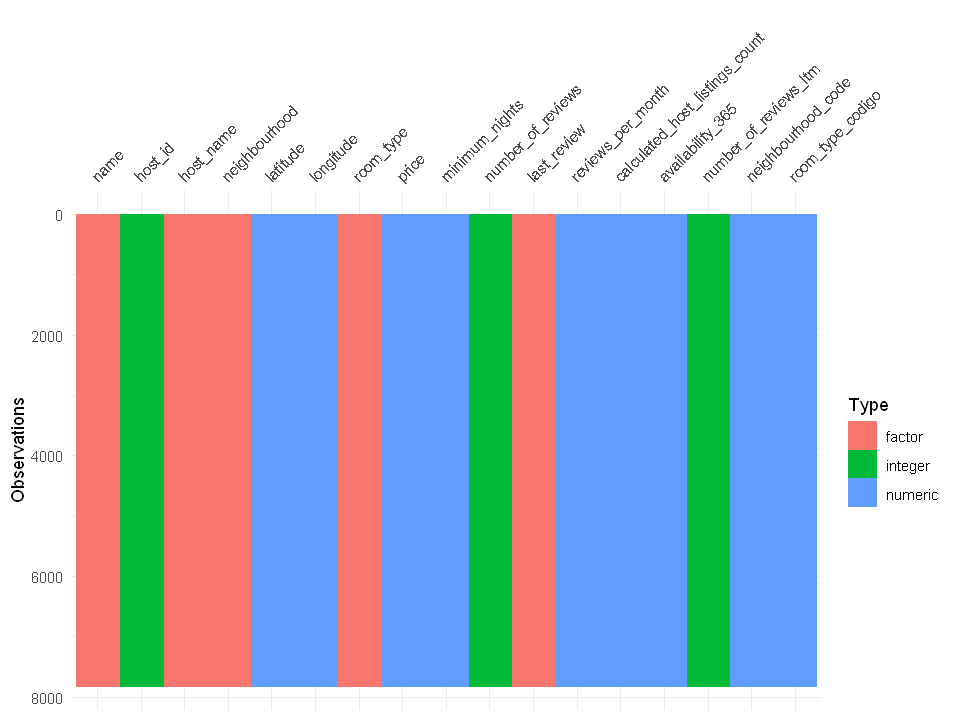

In [299]:
# visualização gráfica do tipo de dados
options(repr.plot.width=8, repr.plot.height=6)

visdat::vis_dat(dados,sort_type = FALSE)

Como comprovado pelos comandos str() e summary(), já não temos variáveis com missing values (NA's).

In [301]:
### Fase 4
#eliminar as variáveis não numericas ou categóricas para estudar a correlação entre as variáveis

amostra_dados <- dados[,-c(1,3,4,7, 11)]
head(amostra_dados)

host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_code,room_type_codigo
942783,55.88566,-3.08646,105,3,45,1.06,1,259,12,2,1
69412742,55.91416,-3.08876,85,3,32,0.51,1,70,0,2,1
115744740,55.98065,-3.19888,46,2,87,2.11,1,193,49,3,3
436998879,55.88203,-3.11861,140,1,0,1.62,3,9,0,2,3
452973676,55.87941,-3.15327,45,1,17,3.42,1,356,17,2,3
165421613,55.87221,-3.15093,40,1,30,1.41,1,123,28,2,3


In [302]:
# matriz de correlação de Pearson
cor(amostra_dados, method="pearson")

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_code,room_type_codigo
host_id,1.00000000,-0.04927157,-0.033166611,-0.015398148,0.014690321,-0.239699266,0.130009139,-0.106855868,0.129947206,-0.089460110,-0.07073704,-0.009767940
latitude,-0.04927157,1.00000000,0.093693791,0.026777022,-0.039290518,0.032107869,0.041868915,0.056979375,-0.033445478,0.039259822,0.69327021,-0.073260009
longitude,-0.03316661,0.09369379,1.000000000,0.002317432,-0.037499289,0.006909257,-0.002479393,0.018154358,-0.018611584,-0.002194308,0.38339400,-0.005661559
price,-0.01539815,0.02677702,0.002317432,1.000000000,0.016396736,-0.081554886,-0.070916302,0.288701109,0.062549261,-0.098022021,0.06075946,-0.042181287
minimum_nights,0.01469032,-0.03929052,-0.037499289,0.016396736,1.000000000,-0.031734476,-0.034417127,-0.005269805,0.065365694,-0.037337352,-0.05504720,0.030037247
number_of_reviews,-0.23969927,0.03210787,0.006909257,-0.081554886,-0.031734476,1.000000000,0.375586952,-0.094174434,-0.051681841,0.703458029,0.02494389,-0.098347788
reviews_per_month,0.13000914,0.04186891,-0.002479393,-0.070916302,-0.034417127,0.375586952,1.000000000,-0.054731301,-0.024517567,0.537646984,0.01671336,-0.004427273
calculated_host_listings_count,-0.10685587,0.05697938,0.018154358,0.288701109,-0.005269805,-0.094174434,-0.054731301,1.000000000,0.101414316,-0.076972843,0.07757799,-0.008848813
availability_365,0.12994721,-0.03344548,-0.018611584,0.062549261,0.065365694,-0.051681841,-0.024517567,0.101414316,1.000000000,-0.028664731,-0.01229440,-0.007746149
number_of_reviews_ltm,-0.08946011,0.03925982,-0.002194308,-0.098022021,-0.037337352,0.703458029,0.537646984,-0.076972843,-0.028664731,1.000000000,0.02950942,-0.115094315


Podemos observar que é a variável calculated_host_listings_count que tem maior correlação com o preço dos Airbnbs (0.288701109), a variável longitude não está praticamente correlacionada com a variável price (0.002317432). A variável price e host_id, number_of_reviews, reviews_per_month, number_of_reviews_ltm e room_type_codigo têm correlação negativa (baixa).
As variáveis latitude, longitude, minimum_nights, calculated_host_listings_count, availability_365 e neighbourhood_code têm correlação positiva (baixa).

In [303]:
library (corrplot)

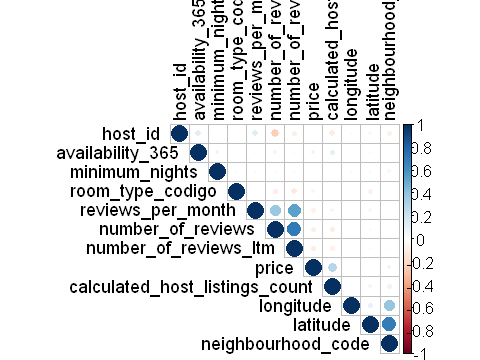

In [304]:
# representação da matriz de correlação, com recurso a cores
corrplot(cor(amostra_dados), type="upper", order="hclust", tl.cex=0.9, tl.col="black")

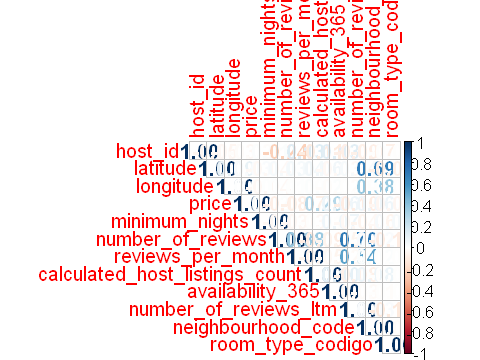

In [305]:
# representação da matriz de correlação, com recurso a números
corrplot(cor(amostra_dados), method = "number", type = "upper")

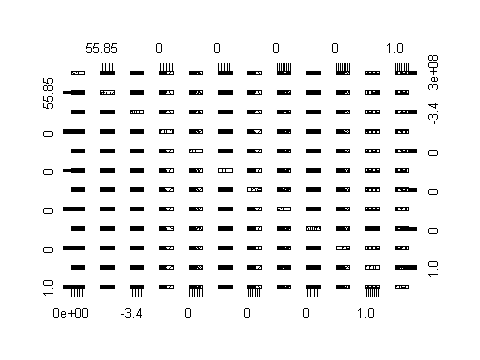

In [306]:
# representação gráfica (diagramas de dispersão) de pares de variáveis
pairs(amostra_dados)

A variável price é assimétrica, existem padrões lineares e não lineares entre as variáveis e diversos pontos extremos/outliers.

# Modelos de Regressão Múltipla

In [307]:
# usamos a biblioteca olsrr para escolher o melhor modelo de forma automática

In [308]:
# escolha do modelo de regressão que melhor se ajusta aos dados com base no p-value
fit <- lm(price ~., data=amostra_dados)  
ols_step_both_p(fit)


                                           Stepwise Selection Summary                                             
-----------------------------------------------------------------------------------------------------------------
                                           Added/                   Adj.                                             
Step               Variable               Removed     R-Square    R-Square      C(p)          AIC          RMSE      
-----------------------------------------------------------------------------------------------------------------
   1    calculated_host_listings_count    addition       0.083       0.083    101.0760    114667.2486    365.1483    
   2        number_of_reviews_ltm         addition       0.089       0.089     53.0740    114619.7019    364.0186    
   3           room_type_codigo           addition       0.092       0.091     34.4830    114601.2073    363.5659    
   4          neighbourhood_code          addition       0.093    

In [309]:
# Escolha do modelo de regressão que melhor se ajusta aos dados com base no AIC
fit <- lm(price ~., data=amostra_dados)
ols_step_both_aic(fit)



                                                  Stepwise Summary                                                   
-------------------------------------------------------------------------------------------------------------------
Variable                           Method        AIC             RSS             Sum Sq         R-Sq      Adj. R-Sq 
-------------------------------------------------------------------------------------------------------------------
calculated_host_listings_count    addition    114667.249    1044133193.566     94939834.775    0.08335      0.08323 
number_of_reviews_ltm             addition    114619.702    1037549504.347    101523523.994    0.08913      0.08890 
room_type_codigo                  addition    114601.207    1034838354.505    104234673.836    0.09151      0.09116 
neighbourhood_code                addition    114588.914    1032951745.636    106121282.706    0.09316      0.09270 
availability_365                  addition    114581.951    103

É de notar que o modelo com base no AIC é o mais completo, pelo que vamos escolher o melhor modelo de regressão dinâmico com base nisso. Também podemos mencionar que nenhum dos dois modelos têm em consideração todas as variáveis presentes em amostra_dados.

In [310]:
# primeiro modelo
fit <- lm(price ~ calculated_host_listings_count + number_of_reviews_ltm 
          + room_type_codigo + neighbourhood_code + availability_365 + latitude +
            longitude + minimum_nights, data=amostra_dados)
summary(fit)


Call:
lm(formula = price ~ calculated_host_listings_count + number_of_reviews_ltm + 
    room_type_codigo + neighbourhood_code + availability_365 + 
    latitude + longitude + minimum_nights, data = amostra_dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-1662.9   -84.4   -41.4    19.4 20292.9 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     5.397e+04  1.969e+04   2.741  0.00613 ** 
calculated_host_listings_count  4.168e+00  1.646e-01  25.331  < 2e-16 ***
number_of_reviews_ltm          -1.338e+00  1.771e-01  -7.554 4.71e-14 ***
room_type_codigo               -2.125e+01  4.487e+00  -4.735 2.23e-06 ***
neighbourhood_code              2.620e+01  5.239e+00   5.001 5.84e-07 ***
availability_365                1.071e-01  3.893e-02   2.751  0.00595 ** 
latitude                       -9.787e+02  3.537e+02  -2.767  0.00567 ** 
longitude                      -2.813e+02  1.131e+02  -2.488  0.01288 *  
minimum_ni

Todas as variáveis são estatísticamente significativas (p-value<0.05), menos a variável minimum_nights (p-value>0.05), tal como a previsão do melhor modelo de regressão com base no p-value previu. Temos um R^2 muito baixo de 9.5%. Os erros residuais são muito elevados. O modelo é globalmente adequado, considerando o valor da estatística F.

Interpretação dos coeficientes, sabendo que estes indicam o crescimento da variável dependente por uma variação unitária numa variável independente e as outras variáveis são consideradas constantes:
- Por exemplo: o coeficiente da variável calculated_host_listings_count é 4.17, ou seja, um crescimento de 1% no número de hóspedes mais conceituados está associado a um crescimento de 4.17% no preço do Airbnb, sendo as restantes variáveis constantes ou controladas.
- Como podemos observar do output, este coeficiente é significativamente diferente de zero (pois, o p-value<0.05), logo a variável calculated_host_listings_count é estatisticamente significativa.

- Também podemos observar que a variável minimum_nights não é estatisticamente significativa, tendo o seu coeficiente nulo (p-value >0.05)

- levando em consideração o coeficiente de determinação R^2, dizemos que 9% da variação dos preços do Airbnbs está explicada pelos preditores (variáveis independentes) do modelo.

In [311]:
summary(fit)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),53974.8740937,1.968897e+04,2.741376,6.132148e-03
calculated_host_listings_count,4.1684536,1.645575e-01,25.331284,3.948213e-136
number_of_reviews_ltm,-1.3380584,1.771395e-01,-7.553699,4.709088e-14
room_type_codigo,-21.2471264,4.487161e+00,-4.735093,2.228064e-06
neighbourhood_code,26.1979637,5.238898e+00,5.000663,5.837570e-07
availability_365,0.1071026,3.893007e-02,2.751154,5.952238e-03
latitude,-978.6980158,3.536845e+02,-2.767150,5.668166e-03
longitude,-281.2925895,1.130719e+02,-2.487733,1.287670e-02
minimum_nights,0.1909833,1.276181e-01,1.496522,1.345581e-01


In [312]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit$residuals)  # média nula
bptest(fit)   # variância constante
bgtest(fit)   # ausência de correlação
jarque.bera.test(fit$residuals)   # distribuição normal

[1] 7.840518e-15


	studentized Breusch-Pagan test

data:  fit
BP = 15.331, df = 8, p-value = 0.05302



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit
LM test = 277.77, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit$residuals
X-squared = 572688232, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value > 0.05, não rejeitamos a H0, logo o pressuposto é verificado (variância é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

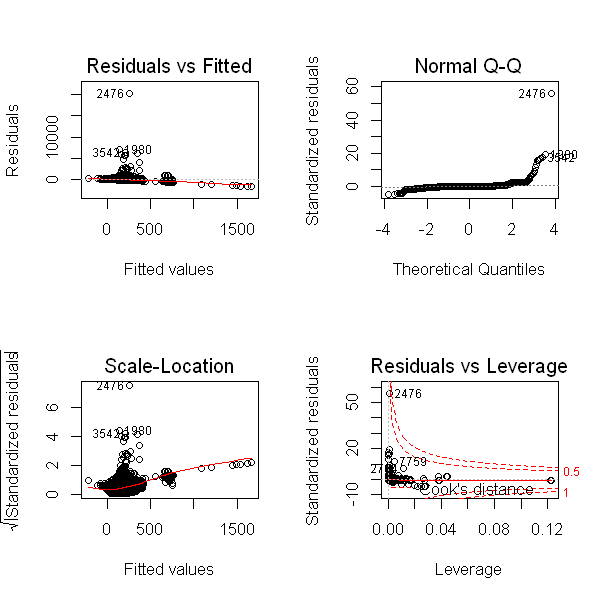

In [313]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: cauda do lado esquerdo e direito afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [314]:
# verificamos se existe multicolinearidade entre as variáveis independentes (VIF >5)
vif(fit)

calculated_host_listings_count          number_of_reviews_ltm 
                      1.023405                       1.022817 
              room_type_codigo             neighbourhood_code 
                      1.022582                       2.415157 
              availability_365                       latitude 
                      1.017437                       2.083912 
                     longitude                 minimum_nights 
                      1.258442                       1.009531

 Como todos os valores são menores que 5, não temos multicolinearidade entre as variáveis independentes

Para tentar corrigir a existência de correlação e de não-normalidade, verificamos se existiam outliers que influenciavam o nosso modelo de regeressão, denominado de fit.

In [315]:
# vamos fazer um teste de outlier para o modelo "fit" 
outlierTest(fit, data=amostra_dados)

      rstudent unadjusted p-value Bonferroni p
2476 72.260861         0.0000e+00   0.0000e+00
1980 19.844384         1.5278e-85   1.1967e-81
3542 17.961796         1.0086e-70   7.9004e-67
7726 17.267136         1.3532e-65   1.0599e-61
2840 16.348459         4.2280e-59   3.3118e-55
3541 15.615210         3.7466e-54   2.9347e-50
3540 15.581038         6.2959e-54   4.9316e-50
3657 13.420045         1.2954e-40   1.0147e-36
7759 11.495078         2.4452e-30   1.9153e-26
7222  8.832375         1.2493e-18   9.7859e-15

Já temos uma lista com o número das posições onde se encontram outliers, pelo que temos que as analisar para saber se as podemos eliminar ou não.

In [316]:
# na lista dos outliers, tentamos entender se os valores são possíveis (situações extremas)
# ou se são realmente erros (procuramos e justificamos as anomalias nas variáveis)

dados[c(2476,1980,3542,7726,2840,3541,3540,3657,7759,7222),]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_code,room_type_codigo
2476,Beautiful Edinburgh Cottage with Parking,11362736,Sonia,Boswall and Pilton,55.92000,-3.21763,Entire home/apt,20551,1,23,29/08/2022,0.43,16,365.0000,3,1,1
1980,Single room,140771770,Andrew,Colinton Mains and Firrhill,55.91138,-3.21944,Private room,7161,4,8,25/10/2021,0.13,2,83.0000,1,1,3
3542,Studio Apartment- Shrubhill Campus Accommodation,248633838,Ben,Broughton South,55.96275,-3.18017,Entire home/apt,6594,1,22,28/08/2022,0.56,5,119.1406,6,4,1
7726,Stunning 3 bed private house with garden. New Town,344268039,Rentir,New Town West,55.95621,-3.20012,Entire home/apt,6500,1,0,29/08/2022,1.62,35,365.0000,0,3,1
2840,Bright 2 bedroom apartment in Edinburgh City,203232514,Raqsana,Prestonfield,55.93466,-3.16491,Entire home/apt,6000,7,9,14/10/2018,0.18,1,90.0000,0,2,1
3541,5 Bedroom Apartment- Murano Campus Accommodation,248633838,Ben,Leith (Albert Street),55.96295,-3.17698,Entire home/apt,5787,1,10,27/08/2022,0.66,5,119.1406,5,4,1
3540,4 Bedroom Apartment- Murano Campus Accommodation,248633838,Ben,Leith (Albert Street),55.96120,-3.17850,Entire home/apt,5772,1,42,27/08/2022,1.08,5,119.1406,9,4,1
3657,9 person GF flat - NEWINGTON - 10 min city!,258601574,Usman,Meadows and Southside,55.93947,-3.17935,Entire home/apt,5000,7,11,01/01/2020,0.28,1,270.0000,0,2,1
7759,Stunning loft apartment on The High St - sleeps 4,344268039,Rentir,Queensferry East,55.99149,-3.39670,Entire home/apt,4500,1,0,29/08/2022,1.62,35,365.0000,0,3,1
7222,Remarkable 5BR Townhouse w/ Garden. Sleeps 12,344268039,Rentir,Tollcross,55.94282,-3.20557,Entire home/apt,3460,2,4,10/08/2022,2.86,35,11.0000,4,1,1


Podemos ver que existem alguns valores elevados na availability_365, em algumas variáveis relativas a avaliações, mas efetivamente o que se destaca é o valor elevado, correspondente ao preço. 

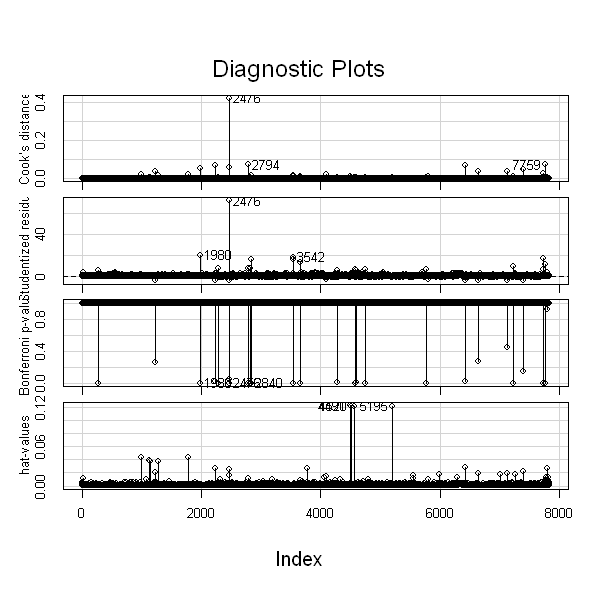

In [317]:
# vamos ver se existem elementos extremos influenciadores 
influenceIndexPlot (fit, id=list(n=3))

Vemos que efetivamente existem algumas observações extemas.

In [318]:
# distância de Cook
cooksd <- cooks.distance(fit)

# detetar se existem influenciadores
influential <- as.numeric(names(cooksd)[(cooksd > 4*mean(cooksd, na.rm=T))])

# visualizar os influenciadores
head(amostra_dados[influential, ])

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_code,room_type_codigo
25,273097,55.93802,-3.17812,1500,7,1,0.01,2,347.0000,0,2,1
268,10651016,55.96329,-3.17321,2270,2,192,1.82,3,119.1406,0,4,3
566,29624831,55.94869,-3.21385,1495,1,24,0.32,16,119.1406,0,1,1
568,29624831,55.94678,-3.21739,1495,1,14,0.18,16,119.1406,0,1,1
997,53736254,55.92196,-3.29308,999,599,3,0.04,5,365.0000,0,1,3
1138,53736254,55.90781,-3.27328,19,555,4,0.05,5,364.0000,0,1,3


Podemos verificar que o que se nota principalmente nestas observações extremas é o preço elevado e algumas minimum_nights mais elevadas - decidimos não as eliminar, porque se tratam de casos pontuais, pelo que consideramos que não iriam afetar significativamente os nossos resultados.

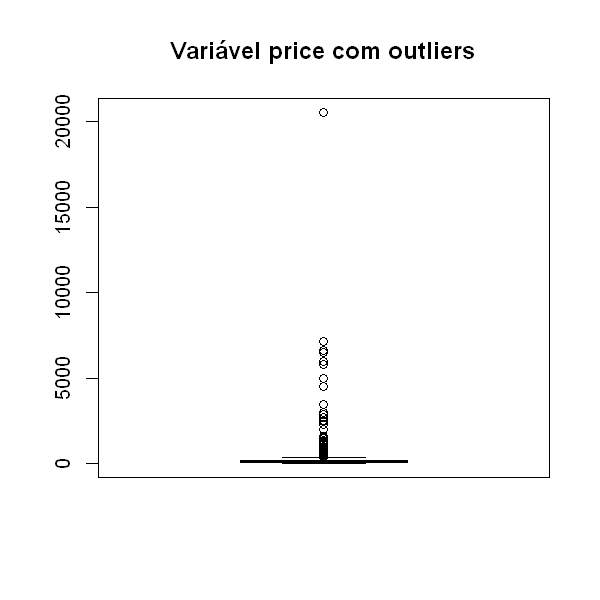

In [319]:
boxplot(amostra_dados$price, main="Variável price com outliers")

In [320]:
# existem vários elementos que se destacam
which.max(amostra_dados$price)

[1] 2476

In [321]:
# eliminar os outliers (da variável price) e denotar o novo data-frame por amostra_dados1

outliers_price <- boxplot(amostra_dados$price, plot=FALSE)$out
amostra_dados[which(amostra_dados$price %in% outliers_price),]
amostra_dados2 <- amostra_dados[-which(amostra_dados$price %in% outliers_price),]

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_code,room_type_codigo
25,273097,55.93802,-3.17812,1500,7,1,0.01,2,347.0000,0,2,1
97,2711564,55.95017,-3.18902,349,3,51,0.43,11,282.0000,22,4,1
118,2989965,55.98616,-3.18849,350,2,144,1.89,6,360.0000,1,4,1
131,3092851,55.94980,-3.18354,338,2,64,0.54,9,120.0000,4,2,1
144,1521996,55.95620,-3.19168,361,2,169,1.46,3,181.0000,23,4,1
193,6748379,55.95627,-3.17459,407,1,77,0.73,8,328.0000,10,4,1
214,6207176,55.97485,-3.16822,400,2,198,1.79,1,293.0000,37,4,1
249,1521996,55.95624,-3.19187,397,2,135,1.27,3,168.0000,30,4,1
250,8081157,55.94370,-3.18457,349,5,8,0.56,1,248.0000,6,2,1
268,10651016,55.96329,-3.17321,2270,2,192,1.82,3,119.1406,0,4,3


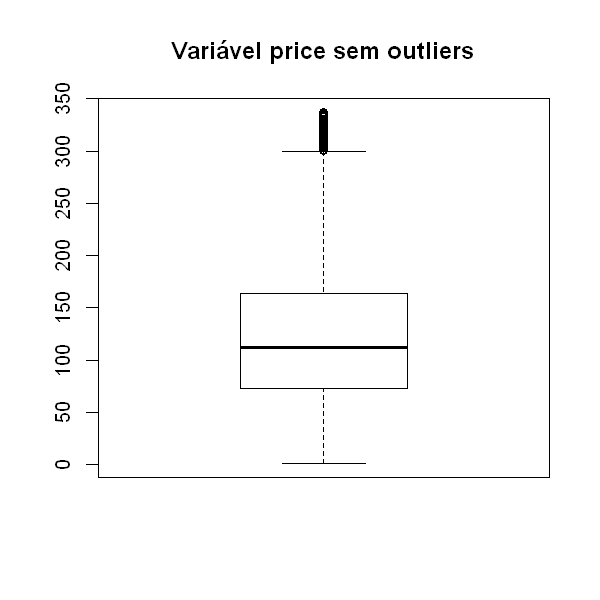

In [322]:
boxplot(amostra_dados2$price, main="Variável price sem outliers")

In [323]:
# estimar o novo modelo de regressão linear múltipla completo para 
# a base de dados sem outliers amostra_dados2
# terceiro modelo

fit2 <- lm(price ~ calculated_host_listings_count + number_of_reviews_ltm 
           + room_type_codigo + neighbourhood_code + availability_365 + latitude +
             longitude + minimum_nights, data=amostra_dados2)

summary(fit2)


Call:
lm(formula = price ~ calculated_host_listings_count + number_of_reviews_ltm + 
    room_type_codigo + neighbourhood_code + availability_365 + 
    latitude + longitude + minimum_nights, data = amostra_dados2)

Residuals:
    Min      1Q  Median      3Q     Max 
-185.24  -38.96  -10.44   27.53  269.59 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -3.874e+03  3.169e+03  -1.223    0.222    
calculated_host_listings_count  1.261e-01  3.237e-02   3.894 9.94e-05 ***
number_of_reviews_ltm          -2.572e-01  2.819e-02  -9.123  < 2e-16 ***
room_type_codigo               -3.577e+01  7.329e-01 -48.802  < 2e-16 ***
neighbourhood_code              1.463e-02  8.541e-01   0.017    0.986    
availability_365                9.787e-02  6.370e-03  15.365  < 2e-16 ***
latitude                        7.176e+01  5.694e+01   1.260    0.208    
longitude                      -9.628e+00  1.845e+01  -0.522    0.602    
minimum_n

Todas as variáveis são estatísticamente significativas (p-value<0.05), menos as variáveis target(price), neighbourhood_code, latitude e longitude (p-value>0.05). Temos um R^2 baixo de 27.96%. Podemos afirmar que apenas 27.96% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo. Os erros residuais elevados. O modelo é globalmente adequado, considerando o valor da estatística F.

In [324]:
summary(fit2)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-3.873712e+03,3.168527e+03,-1.22255940,2.215358e-01
calculated_host_listings_count,1.260572e-01,3.237115e-02,3.89412049,9.943845e-05
number_of_reviews_ltm,-2.571510e-01,2.818612e-02,-9.12331756,9.281973e-20
room_type_codigo,-3.576526e+01,7.328608e-01,-48.80225848,0.000000e+00
neighbourhood_code,1.463115e-02,8.540651e-01,0.01713119,9.863324e-01
availability_365,9.786651e-02,6.369651e-03,15.36450193,1.878534e-52
latitude,7.176486e+01,5.694036e+01,1.26035131,2.075831e-01
longitude,-9.628043e+00,1.845012e+01,-0.52184179,6.017964e-01
minimum_nights,-1.098651e-01,2.192676e-02,-5.01054765,5.555624e-07


In [325]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit2$residuals)  # média nula
bptest(fit2)   # variância constante
bgtest(fit2)   # ausência de correlação
jarque.bera.test(fit2$residuals)   # distribuição normal

[1] 5.281063e-16


	studentized Breusch-Pagan test

data:  fit2
BP = 311.88, df = 8, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit2
LM test = 41.485, df = 1, p-value = 1.188e-10



	Jarque Bera Test

data:  fit2$residuals
X-squared = 1215.7, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

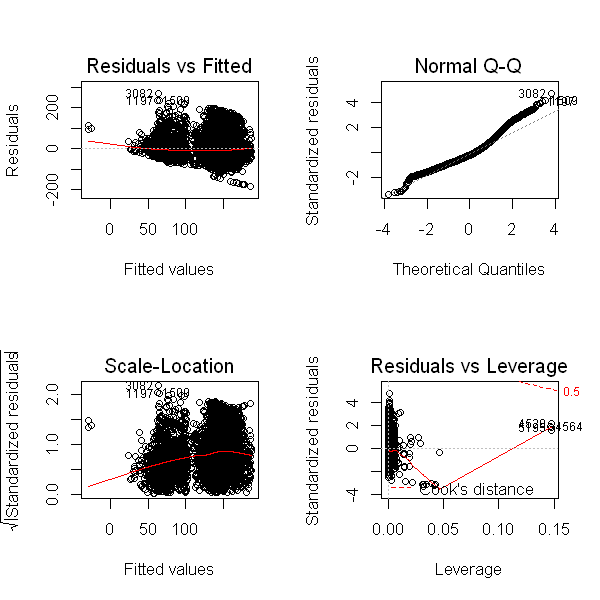

In [326]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit2)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: cauda do lado direito afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [327]:
# ainda parece termos alguns outliers (que estão a enviesar os resultados)
# comparar os dois modelos pelo AIC
AIC(fit, fit2)


Warning message in AIC.default(fit, fit2):
"models are not all fitted to the same number of observations"

,df,AIC
fit,10,114574.59
fit2,10,79484.44


Neste caso, o melhor modelo é o modelo fit2. Com base no AIC, o melhor modelo é o com menor valor.

In [328]:
# como pode ser observado, após a eliminação de vários outliers, ainda não conseguimos corrigir
# a heterocedasticidade, nem a normalidade dos resíduos
# vamos proceder com algumas transformações nas variáveis (podemos fazer log(y), sqrt(y), 1/y, etc)

# transformação aplicada: log da variável dependent - tem como efeito a redução da heterocedasticidade
# quarto modelo

fit3 <- lm(log(price) ~ calculated_host_listings_count + number_of_reviews_ltm 
           + room_type_codigo + neighbourhood_code + availability_365 + latitude +
             longitude + minimum_nights, data=amostra_dados2)

summary(fit3)


Call:
lm(formula = log(price) ~ calculated_host_listings_count + number_of_reviews_ltm + 
    room_type_codigo + neighbourhood_code + availability_365 + 
    latitude + longitude + minimum_nights, data = amostra_dados2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8220 -0.3061 -0.0001  0.3249  1.7696 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -7.619e+01  2.784e+01  -2.737  0.00621 ** 
calculated_host_listings_count -2.387e-03  2.844e-04  -8.392  < 2e-16 ***
number_of_reviews_ltm          -1.606e-03  2.476e-04  -6.487 9.36e-11 ***
room_type_codigo               -3.653e-01  6.438e-03 -56.740  < 2e-16 ***
neighbourhood_code             -6.113e-03  7.503e-03  -0.815  0.41523    
availability_365                9.844e-04  5.596e-05  17.592  < 2e-16 ***
latitude                        1.465e+00  5.002e-01   2.928  0.00342 ** 
longitude                       1.802e-01  1.621e-01   1.112  0.26638    
mini

Todas as variáveis são estatísticamente significativas (p-value<0.05), menos as variáveis neighbourhood_code e longitude (p-value>0.05). Temos um R^2 moderado-baixo de 33.30%. Logo, 33.30% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo. Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [329]:
summary(fit3)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-7.619084e+01,2.783638e+01,-2.7370961,6.213488e-03
calculated_host_listings_count,-2.386530e-03,2.843895e-04,-8.3917671,5.700507e-17
number_of_reviews_ltm,-1.606207e-03,2.476228e-04,-6.4865052,9.361036e-11
room_type_codigo,-3.653154e-01,6.438383e-03,-56.7402434,0.000000e+00
neighbourhood_code,-6.113373e-03,7.503197e-03,-0.8147691,4.152312e-01
availability_365,9.844356e-04,5.595913e-05,17.5920470,7.124520e-68
latitude,1.464639e+00,5.002367e-01,2.9278910,3.423285e-03
longitude,1.801648e-01,1.620894e-01,1.1115155,2.663833e-01
minimum_nights,-1.339242e-03,1.926326e-04,-6.9523125,3.905538e-12


In [330]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit3$residuals)  # média nula
bptest(fit3)   # variância constante
bgtest(fit3)   # ausência de correlação
jarque.bera.test(fit3$residuals)   # distribuição normal

[1] 2.240483e-17


	studentized Breusch-Pagan test

data:  fit3
BP = 1228.6, df = 8, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit3
LM test = 66.29, df = 1, p-value = 3.892e-16



	Jarque Bera Test

data:  fit3$residuals
X-squared = 20656, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

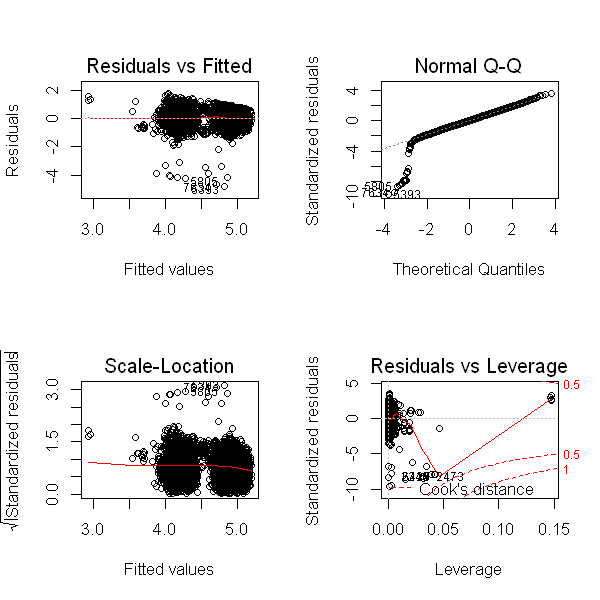

In [331]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit3)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, parece não ter linearidade
- **Normal Q-Q**: cauda do lado esquerdo afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**:resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [332]:
# comparar os dois modelos - fit3 e fit4 - pelo AIC
AIC(fit2, fit3)

,df,AIC
fit2,10,79484.44
fit3,10,10566.47


O modelo com menor AIC é o modelo fit3.

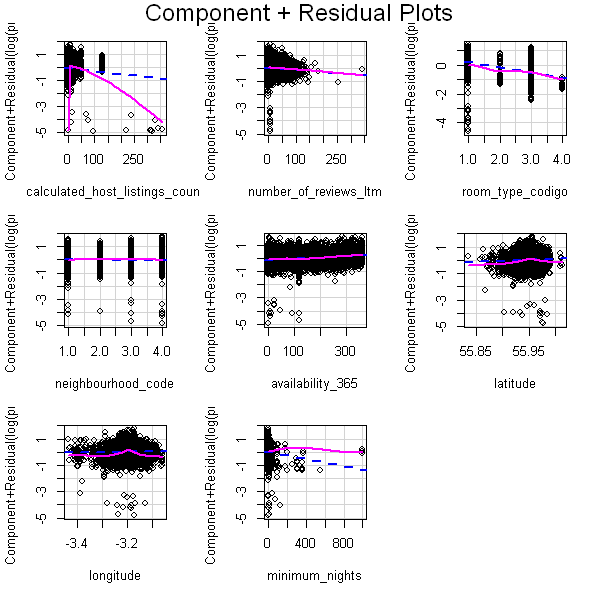

In [333]:
# vamos ver se existem não-linearidades nas variáveis/resíduos
crPlots (fit3)

Podemos observar que as variáveis calculated_host_listings_count, room_type_codigo, latitude, longitude e minimum_nights, não estavam sobre a linha azul, pelo que existe não linearidade nestas variáveis.

In [410]:
# observa-se não-linearidade na variável calculated_host_listing_count, latitude, longitude, room_type_codigo
# corremos um novo modelo de regressão linear múltipla onde acrescentamos 
# não-linearidade nas variáveis calculated_host_listings_count, room_type_codigo, latitude e longitude (polinómio cúbico)

fit4 <- lm(log(price) ~ poly(calculated_host_listings_count, degree=3)
           + number_of_reviews_ltm 
           + poly(room_type_codigo, degree=3)
           + neighbourhood_code + availability_365 + poly(latitude, degree=2) 
           + poly(longitude, degree=3) + poly(minimum_nights, degree=3)
           , data=amostra_dados2)

summary(fit4)


Call:
lm(formula = log(price) ~ poly(calculated_host_listings_count, 
    degree = 3) + number_of_reviews_ltm + poly(room_type_codigo, 
    degree = 3) + neighbourhood_code + availability_365 + poly(latitude, 
    degree = 2) + poly(longitude, degree = 3) + poly(minimum_nights, 
    degree = 3), data = amostra_dados2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0006 -0.2904  0.0029  0.2916  1.5986 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        4.542e+00  2.260e-02 200.926
poly(calculated_host_listings_count, degree = 3)1 -4.366e+00  4.724e-01  -9.243
poly(calculated_host_listings_count, degree = 3)2 -1.260e+01  4.714e-01 -26.734
poly(calculated_host_listings_count, degree = 3)3  8.649e-01  4.660e-01   1.856
number_of_reviews_ltm                             -2.296e-03  2.324e-04  -9.877
poly(room_type_codigo, degree = 3)1               -2.752e+01  4.749e-01 -57.950
poly(room_

Todas as variáveis são estatísticamente significativas (p-value<0.05), menos a variável latitude e longitude, ambas de grau 1 (p-value>0.05). Temos um R^2 moderado-baixo de 42.98%. Logo, 42.98% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo. Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [411]:
summary(fit4)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.541526e+00,2.260301e-02,200.9257114,0.000000e+00
"poly(calculated_host_listings_count, degree = 3)1",-4.366186e+00,4.723980e-01,-9.2425997,3.105073e-20
"poly(calculated_host_listings_count, degree = 3)2",-1.260365e+01,4.714426e-01,-26.7342279,2.935785e-150
"poly(calculated_host_listings_count, degree = 3)3",8.649181e-01,4.659681e-01,1.8561744,6.346919e-02
number_of_reviews_ltm,-2.295865e-03,2.324444e-04,-9.8770518,7.292441e-23
"poly(room_type_codigo, degree = 3)1",-2.752156e+01,4.749215e-01,-57.9497125,0.000000e+00
"poly(room_type_codigo, degree = 3)2",-1.300246e+00,4.629231e-01,-2.8087739,4.986344e-03
"poly(room_type_codigo, degree = 3)3",-3.318848e+00,4.656480e-01,-7.1273751,1.121489e-12
neighbourhood_code,1.420919e-02,7.781866e-03,1.8259361,6.790095e-02
availability_365,8.647065e-04,5.238107e-05,16.5079979,3.968062e-60


In [336]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit4$residuals)  # média nula
bptest(fit4)   # variância constante
bgtest(fit4)   # ausência de correlação
jarque.bera.test(fit4$residuals)   # distribuição normal

[1] 1.846247e-17


	studentized Breusch-Pagan test

data:  fit4
BP = 168.77, df = 17, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit4
LM test = 67.613, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit4$residuals
X-squared = 12797, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

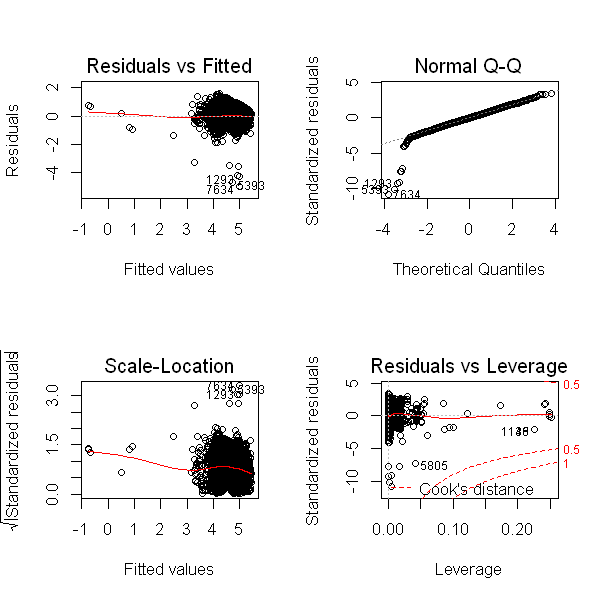

In [337]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit4)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: cauda do lado esquerdo afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [338]:
AIC(fit3, fit4)

,df,AIC
fit3,10,10566.466
fit4,19,9443.316


O modelo fit4 é o melhor modelo.

In [339]:
# novo modelo com não-linearidade em room_type_codigo, latitude e longitude, dada pela função hiperbólica 1/x

fit5 <- lm(log(price) ~ calculated_host_listings_count 
           +number_of_reviews_ltm 
           + room_type_codigo +   I(1/room_type_codigo)
           + neighbourhood_code + availability_365 + latitude +  I(1/latitude) +
             longitude + I(1/longitude)+ minimum_nights + I(1/minimum_nights), data=amostra_dados2)

summary(fit5)


Call:
lm(formula = log(price) ~ calculated_host_listings_count + number_of_reviews_ltm + 
    room_type_codigo + I(1/room_type_codigo) + neighbourhood_code + 
    availability_365 + latitude + I(1/latitude) + longitude + 
    I(1/longitude) + minimum_nights + I(1/minimum_nights), data = amostra_dados2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8629 -0.3006  0.0048  0.3108  1.6440 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     5.931e+05  7.605e+04   7.798 7.15e-15 ***
calculated_host_listings_count -2.745e-03  2.795e-04  -9.821  < 2e-16 ***
number_of_reviews_ltm          -2.348e-03  2.474e-04  -9.491  < 2e-16 ***
room_type_codigo               -3.745e-01  9.453e-02  -3.962 7.52e-05 ***
I(1/room_type_codigo)           1.611e-02  2.846e-01   0.057    0.955    
neighbourhood_code              3.699e-02  8.044e-03   4.599 4.32e-06 ***
availability_365                9.452e-04  5.510e-05  17.155  < 2e-1

Todas as variáveis são estatísticamente significativas (p-value<0.05), menos a variável 1/room_type_codigo (p-value>0.05). Temos um R^2 moderado-baixo de 35.97%. Logo, 35.97% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo. Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [340]:
summary(fit5)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.930730e+05,7.605187e+04,7.79827063,7.152393e-15
calculated_host_listings_count,-2.745296e-03,2.795314e-04,-9.82106390,1.263250e-22
number_of_reviews_ltm,-2.347744e-03,2.473558e-04,-9.49136561,3.026492e-21
room_type_codigo,-3.744683e-01,9.452620e-02,-3.96152885,7.518370e-05
I(1/room_type_codigo),1.611454e-02,2.846211e-01,0.05661749,9.548515e-01
neighbourhood_code,3.699280e-02,8.043837e-03,4.59890057,4.319185e-06
availability_365,9.452373e-04,5.510017e-05,17.15489071,1.073414e-64
latitude,-5.298399e+03,6.798504e+02,-7.79347746,7.426799e-15
I(1/latitude),-1.658029e+07,2.127382e+06,-7.79375036,7.410901e-15
longitude,4.345187e+01,4.829127e+00,8.99787309,2.894738e-19


In [341]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit5$residuals)  # média nula
bptest(fit5)   # variância constante
bgtest(fit5)   # ausência de correlação
jarque.bera.test(fit5$residuals)   # distribuição normal

[1] 9.530514e-18


	studentized Breusch-Pagan test

data:  fit5
BP = 1171.2, df = 12, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit5
LM test = 66.084, df = 1, p-value = 4.321e-16



	Jarque Bera Test

data:  fit5$residuals
X-squared = 18456, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

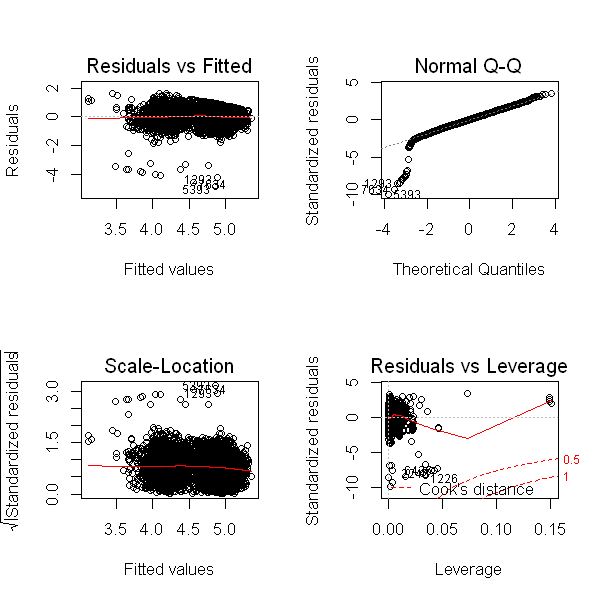

In [342]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit5)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma linearidade
- **Normal Q-Q**: cauda do lado esquerdo afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [343]:
AIC(fit3,fit4,fit5)

,df,AIC
fit3,10,10566.466
fit4,19,9443.316
fit5,14,10277.779


O modelo fit4 continua a ser o melhor modelo.

In [344]:
# novo modelo de regressão com não-linearidade na variável room_type_codigo, latitude, longitude e interação entre variáveis

fit6 <- lm(log(price) ~ calculated_host_listings_count 
           + number_of_reviews_ltm 
           + room_type_codigo +   I(1/room_type_codigo)
           + neighbourhood_code + availability_365 + latitude*longitude +  I(1/latitude) +
           + I(1/longitude) + minimum_nights + I(1/minimum_nights), data=amostra_dados2)

summary(fit6)


Call:
lm(formula = log(price) ~ calculated_host_listings_count + number_of_reviews_ltm + 
    room_type_codigo + I(1/room_type_codigo) + neighbourhood_code + 
    availability_365 + latitude * longitude + I(1/latitude) + 
    +I(1/longitude) + minimum_nights + I(1/minimum_nights), data = amostra_dados2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8474 -0.2997  0.0055  0.3113  1.9767 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     5.845e+05  7.606e+04   7.684 1.74e-14 ***
calculated_host_listings_count -2.763e-03  2.794e-04  -9.888  < 2e-16 ***
number_of_reviews_ltm          -2.350e-03  2.472e-04  -9.507  < 2e-16 ***
room_type_codigo               -3.713e-01  9.448e-02  -3.930 8.58e-05 ***
I(1/room_type_codigo)           2.827e-02  2.845e-01   0.099  0.92084    
neighbourhood_code              4.206e-02  8.216e-03   5.119 3.15e-07 ***
availability_365                9.431e-04  5.507e-05  17.123  < 2e-

Todas as variáveis são estatísticamente significativas (p-value<0.05), menos a variável 1/room_type_codigo (p-value>0.05). Temos um R^2 moderado-baixo de 36.04%. Logo, 36.04% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo. Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [345]:
summary(fit6)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.845114e+05,7.606416e+04,7.68445232,1.738299e-14
calculated_host_listings_count,-2.763165e-03,2.794425e-04,-9.88813361,6.537199e-23
number_of_reviews_ltm,-2.350388e-03,2.472222e-04,-9.50719059,2.604787e-21
room_type_codigo,-3.713017e-01,9.448046e-02,-3.92993117,8.575871e-05
I(1/room_type_codigo),2.827371e-02,2.844946e-01,0.09938223,9.208375e-01
neighbourhood_code,4.206004e-02,8.215956e-03,5.11931201,3.145271e-07
availability_365,9.430700e-04,5.507481e-05,17.12343625,1.806041e-64
latitude,-5.245687e+03,6.797072e+02,-7.71756930,1.344210e-14
longitude,8.797957e+02,2.796206e+02,3.14639046,1.659671e-03
I(1/latitude),-1.626489e+07,2.128832e+06,-7.64028739,2.445227e-14


In [346]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit6$residuals)  # média nula
bptest(fit6)   # variância constante
bgtest(fit6)   # ausência de correlação
jarque.bera.test(fit6$residuals)   # distribuição normal

[1] 4.994503e-18


	studentized Breusch-Pagan test

data:  fit6
BP = 1193.5, df = 13, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit6
LM test = 65.8, df = 1, p-value = 4.991e-16



	Jarque Bera Test

data:  fit6$residuals
X-squared = 18623, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

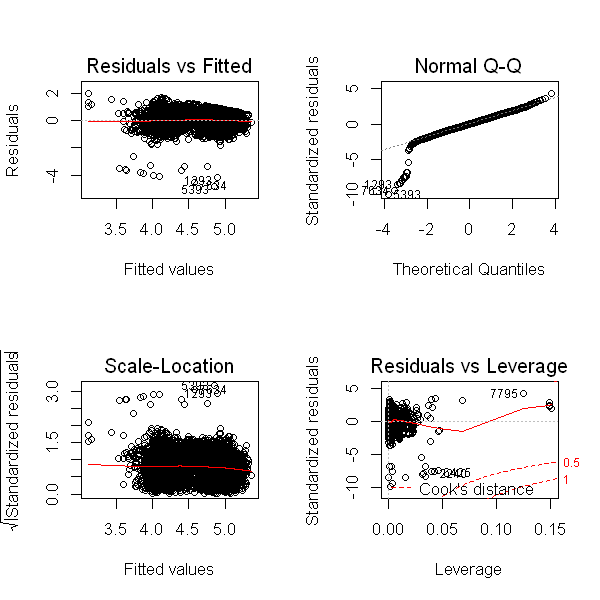

In [347]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit6)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma linearidade
- **Normal Q-Q**: cauda do lado esquerdo afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [348]:
AIC(fit3,fit4,fit5,fit6)

,df,AIC
fit3,10,10566.466
fit4,19,9443.316
fit5,14,10277.779
fit6,15,10270.818


O melhor modelo é o fit4.

In [349]:
# vamos fazer um teste de outlier para o modelo "fit6" 
outlierTest(fit6, data=comp2)

      rstudent unadjusted p-value Bonferroni p
5393 -9.980150         2.6294e-23   1.9137e-19
7634 -9.416140         6.1576e-21   4.4815e-17
1293 -8.625769         7.7319e-18   5.6272e-14
5805 -8.493226         2.4130e-17   1.7562e-13
1226 -8.396464         5.4800e-17   3.9884e-13
7123 -8.083468         7.3177e-16   5.3259e-12
6634 -7.991074         1.5447e-15   1.1242e-11
2240 -7.648380         2.2974e-14   1.6720e-10
6881 -7.604197         3.2272e-14   2.3487e-10
2473 -7.596284         3.4290e-14   2.4956e-10

In [350]:
amostra_dados[c(1226, 7123, 7634, 5393, 7398, 1293, 1307 ),]

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_code,room_type_codigo
1226,78679116,55.98522,-3.188920,1,1.000000,19,1,318,92.0000,7,4,1
7123,464597617,55.97440,-3.242300,1,5.000000,19,2,310,5.0000,7,3,1
7634,1684355,55.97561,-3.236420,1,4.768033,19,1,94,119.1406,7,3,1
5393,83384069,55.97703,-3.174210,1,1.000000,19,1,0,1.0000,7,4,1
7398,405995127,55.95162,-3.211469,2,2.000000,19,1,329,2.0000,7,3,1
1293,53339107,55.93689,-3.217530,2,2.000000,19,2,12,119.1406,7,1,1
1307,28641032,55.96076,-3.177840,4,4.000000,19,1,15,22.0000,7,4,1


O outlier não parece ser influenciador, portanto não vamos eliminar da base de dados. O que chama mais a atenção é o preço ser bastante baixo para um Entire_room/apt. Mas vamos assumir que estes valores estão certos e que o proprietário pode estar a alugar sem querer pôr um preço muito elevado. Se repararmos ainda nas avaliações, no número mínimo de noites percebemos que estes apartamentos costumam estar alugados com frequência, pelo que o preço baixo pode ser uma estratégia para continuar a ter clientes.

## Método de estimação dos mínimos quadrados com pesos (WLS)

In [351]:
# vamos tentar estabilizar a variância usando técnicas diferentes, nomeadamente
# vamos estimar os parâmetros com o método dos mínimos quadrados ponderados (com pesos) (weighted LS)

In [352]:
# definimos os pesos - termo que vai dividir os dois lados da equação
# vou usar o modelo 4 como referência porque é o melhor modelo obtido até ao momento

N<-length(amostra_dados2$price) ### pesos

# peso = 1/((1:N)^2)
# modelo de regressão - para adicionar os pesos, temos de usar a opção "weights=..."

fit7 <- lm(log(price) ~ poly(calculated_host_listings_count, degree=3)
           + number_of_reviews_ltm 
           + poly(room_type_codigo, degree=3)
           + neighbourhood_code + availability_365 + poly(latitude, degree=2) +
             poly(longitude, degree=3) + poly(minimum_nights, degree=3)
           , data=amostra_dados2, weights = 1/((1:N)^0.5))



# peso = 1/((1:N)^2)
# modelo de regressão - para adicionar os pesos, temos de usar a opção "weights=..."

summary(fit7)


Call:
lm(formula = log(price) ~ poly(calculated_host_listings_count, 
    degree = 3) + number_of_reviews_ltm + poly(room_type_codigo, 
    degree = 3) + neighbourhood_code + availability_365 + poly(latitude, 
    degree = 2) + poly(longitude, degree = 3) + poly(minimum_nights, 
    degree = 3), data = amostra_dados2, weights = 1/((1:N)^0.5))

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.72659 -0.03787  0.00241  0.04209  0.77301 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        4.536e+00  2.226e-02 203.787
poly(calculated_host_listings_count, degree = 3)1 -4.341e+00  5.465e-01  -7.942
poly(calculated_host_listings_count, degree = 3)2 -1.257e+01  5.212e-01 -24.125
poly(calculated_host_listings_count, degree = 3)3  6.484e-01  5.171e-01   1.254
number_of_reviews_ltm                             -2.238e-03  2.212e-04 -10.119
poly(room_type_codigo, degree = 3)1           

Todas as variáveis são estatísticamente significativas (p-value<0.05), menos a variável calculated_host_listings_count de grau 3 e longitude de grau 3. Temos um R^2 moderado de 43.51%. Logo, 43.51% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo. Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [353]:
summary(fit7)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.536286e+00,2.225990e-02,203.7873206,0.000000e+00
"poly(calculated_host_listings_count, degree = 3)1",-4.340538e+00,5.464988e-01,-7.9424480,2.281409e-15
"poly(calculated_host_listings_count, degree = 3)2",-1.257281e+01,5.211558e-01,-24.1248640,9.207726e-124
"poly(calculated_host_listings_count, degree = 3)3",6.484027e-01,5.170684e-01,1.2539979,2.098831e-01
number_of_reviews_ltm,-2.238301e-03,2.212018e-04,-10.1188182,6.564649e-24
"poly(room_type_codigo, degree = 3)1",-2.887421e+01,4.655579e-01,-62.0206638,0.000000e+00
"poly(room_type_codigo, degree = 3)2",-1.275245e+00,5.050136e-01,-2.5251690,1.158538e-02
"poly(room_type_codigo, degree = 3)3",-1.926565e+00,4.878131e-01,-3.9493927,7.909097e-05
neighbourhood_code,1.447117e-02,7.578703e-03,1.9094520,5.624318e-02
availability_365,7.881181e-04,5.181477e-05,15.2102967,1.865942e-51


In [354]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit7$residuals)  # média nula
bptest(fit7)   # variância constante
bgtest(fit7)   # ausência de correlação
jarque.bera.test(fit7$residuals)   # distribuição normal


[1] 0.01459148


	studentized Breusch-Pagan test

data:  fit7
BP = 168.77, df = 17, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit7
LM test = 67.613, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit7$residuals
X-squared = 13181, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

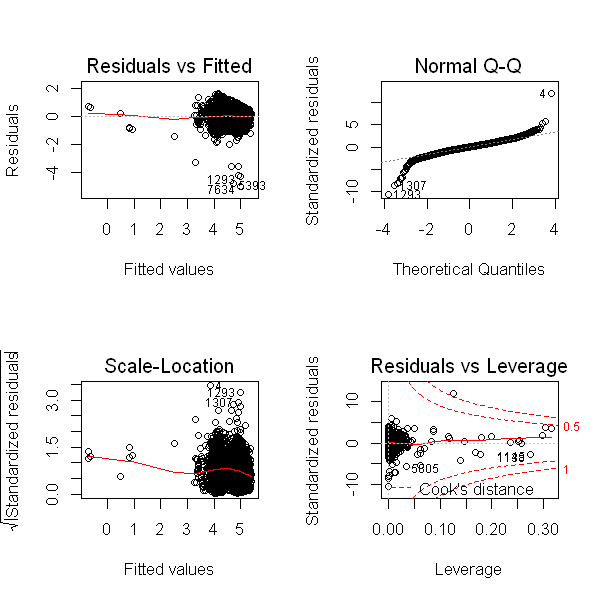

In [355]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit7)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: cauda do lado esquerdo e direita afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [356]:
AIC(fit4,fit7)

,df,AIC
fit4,19,9443.316
fit7,19,10503.963


O melhor modelo é o fit4.

In [357]:
# definir pesos com base nos valores preditos /ajustados
# pesos 2
yhat<- predict(fit2,data=amostra_dados2)
w <- 1/sqrt(yhat)

fit8 <- lm(log(price) ~ poly(calculated_host_listings_count, degree=3)
           + number_of_reviews_ltm 
           + poly(room_type_codigo, degree=3)
           + neighbourhood_code + availability_365 + poly(latitude, degree=2) + 
             poly(longitude, degree=3) + poly(minimum_nights, degree=3)
           , data=amostra_dados2, weights = w)

summary(fit8)

Warning message in sqrt(yhat):
"NaNs produced"


Call:
lm(formula = log(price) ~ poly(calculated_host_listings_count, 
    degree = 3) + number_of_reviews_ltm + poly(room_type_codigo, 
    degree = 3) + neighbourhood_code + availability_365 + poly(latitude, 
    degree = 2) + poly(longitude, degree = 3) + poly(minimum_nights, 
    degree = 3), data = amostra_dados2, weights = w)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.40979 -0.08700  0.00061  0.08815  0.56036 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        4.543e+00  2.283e-02 198.985
poly(calculated_host_listings_count, degree = 3)1 -4.181e+00  5.191e-01  -8.054
poly(calculated_host_listings_count, degree = 3)2 -1.280e+01  5.169e-01 -24.761
poly(calculated_host_listings_count, degree = 3)3  1.109e+00  5.020e-01   2.209
number_of_reviews_ltm                             -2.326e-03  2.272e-04 -10.235
poly(room_type_codigo, degree = 3)1               -2.751e+

Todas as variáveis são estatísticamente significativas, menos as variáveis latitude de grau 1 e longitude de grau1. Temos um R^2 moderado de 44.57%. Logo, 44.57% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [358]:
summary(fit8)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.542619e+00,2.282897e-02,198.9848628,0.000000e+00
"poly(calculated_host_listings_count, degree = 3)1",-4.180996e+00,5.191353e-01,-8.0537695,9.313474e-16
"poly(calculated_host_listings_count, degree = 3)2",-1.279852e+01,5.168813e-01,-24.7610348,5.202035e-130
"poly(calculated_host_listings_count, degree = 3)3",1.108809e+00,5.019911e-01,2.2088218,2.721817e-02
number_of_reviews_ltm,-2.325754e-03,2.272293e-04,-10.2352742,2.018343e-24
"poly(room_type_codigo, degree = 3)1",-2.751371e+01,4.529951e-01,-60.7373320,0.000000e+00
"poly(room_type_codigo, degree = 3)2",-1.395725e+00,3.918852e-01,-3.5615658,3.710125e-04
"poly(room_type_codigo, degree = 3)3",-3.410938e+00,4.463451e-01,-7.6419315,2.414723e-14
neighbourhood_code,1.533379e-02,7.881828e-03,1.9454614,5.175804e-02
availability_365,8.392697e-04,5.326068e-05,15.7577717,4.928168e-55


In [359]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit8$residuals)  # média nula
bptest(fit8)   # variância constante
bgtest(fit8)   # ausência de correlação
jarque.bera.test(fit8$residuals)   # distribuição normal


[1] 2.264764e-05


	studentized Breusch-Pagan test

data:  fit8
BP = 168.53, df = 17, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit8
LM test = 67.949, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit8$residuals
X-squared = 12966, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

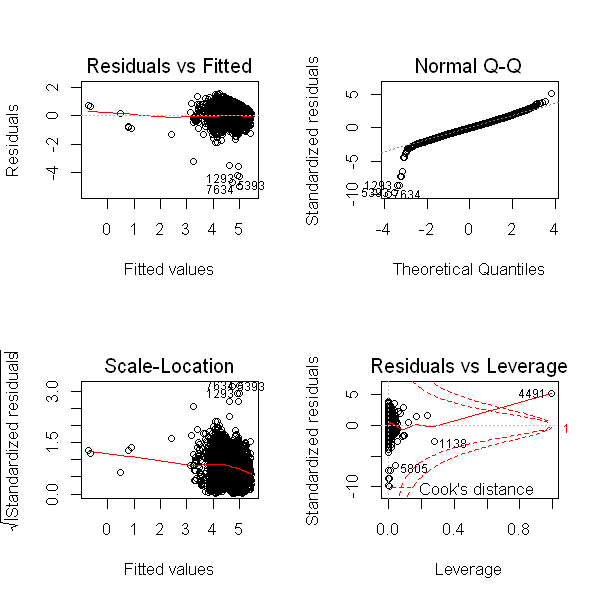

In [360]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit8)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: cauda do lado esquerdo afastada e direita ligeiramente afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [361]:
AIC(fit4, fit6,fit7,fit8)

Warning message in AIC.default(fit4, fit6, fit7, fit8):
"models are not all fitted to the same number of observations"

,df,AIC
fit4,19,9443.316
fit6,15,10270.818
fit7,19,10503.963
fit8,19,9620.451


O modelo fit4 é uma vez mais o melhor.

In [362]:
# definir pesos com base nos valores preditos /ajustados
# pesos 3
#definir uma regressão robusta com a função "rlm" da biblioteca MASS (e com pesos)

yhat<- predict(fit2,data=amostra_dados2)
w1 <- 1/sqrt(yhat)

fit9 <- rlm(log(price) ~ poly(calculated_host_listings_count, degree=3)
           + number_of_reviews_ltm 
           + poly(room_type_codigo, degree=3)
           + neighbourhood_code + availability_365 + poly(latitude, degree=2) + 
             poly(longitude, degree=3) + poly(minimum_nights, degree=3)
           , data=amostra_dados2, weights = w1)

summary(fit9)

Warning message in sqrt(yhat):
"NaNs produced"


Call: rlm(formula = log(price) ~ poly(calculated_host_listings_count, 
    degree = 3) + number_of_reviews_ltm + poly(room_type_codigo, 
    degree = 3) + neighbourhood_code + availability_365 + poly(latitude, 
    degree = 2) + poly(longitude, degree = 3) + poly(minimum_nights, 
    degree = 3), data = amostra_dados2, weights = w1)
Residuals:
       Min         1Q     Median         3Q        Max 
-1.4309091 -0.0872346 -0.0006829  0.0876227  0.5643738 

Coefficients:
                                                  Value    Std. Error t value 
(Intercept)                                         4.5590   0.0221   206.5198
poly(calculated_host_listings_count, degree = 3)1  -2.9481   0.5020    -5.8727
poly(calculated_host_listings_count, degree = 3)2 -12.6263   0.4998   -25.2618
poly(calculated_host_listings_count, degree = 3)3   0.7214   0.4854     1.4862
number_of_reviews_ltm                              -0.0024   0.0002   -11.1167
poly(room_type_codigo, degree = 3)1               -2

In [363]:
summary(fit9)$coefficient

,Value,Std. Error,t value
(Intercept),4.558978411,2.207526e-02,206.5198000
"poly(calculated_host_listings_count, degree = 3)1",-2.948090131,5.019958e-01,-5.8727381
"poly(calculated_host_listings_count, degree = 3)2",-12.626266201,4.998163e-01,-25.2618160
"poly(calculated_host_listings_count, degree = 3)3",0.721409648,4.854176e-01,1.4861629
number_of_reviews_ltm,-0.002442642,2.197272e-04,-11.1167065
"poly(room_type_codigo, degree = 3)1",-28.399054795,4.380393e-01,-64.8322110
"poly(room_type_codigo, degree = 3)2",-0.939472977,3.789469e-01,-2.4791676
"poly(room_type_codigo, degree = 3)3",-4.037714405,4.316088e-01,-9.3550333
neighbourhood_code,0.013554353,7.621606e-03,1.7784117
availability_365,0.000783943,5.150226e-05,15.2215272


In [364]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit9$residuals)  # média nula
bptest(fit9)   # variância constante
bgtest(fit9)   # ausência de correlação
jarque.bera.test(fit9$residuals)   # distribuição normal

[1] -0.001504062


	studentized Breusch-Pagan test

data:  fit9
BP = 168.53, df = 17, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit9
LM test = 67.949, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit9$residuals
X-squared = 14157, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

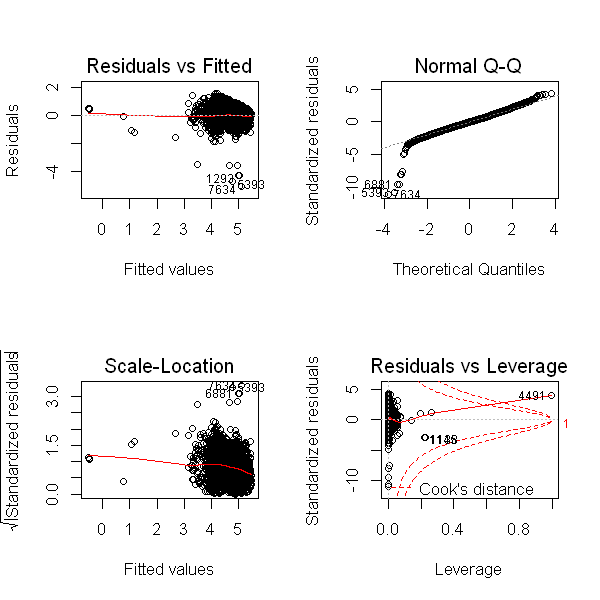

In [365]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit9)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: cauda do lado esquerdo afastada e direita ligeiramente afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [366]:
AIC(fit4, fit6,fit7,fit8, fit9)

Warning message in AIC.default(fit4, fit6, fit7, fit8, fit9):
"models are not all fitted to the same number of observations"

,df,AIC
fit4,19,9443.316
fit6,15,10270.818
fit7,19,10503.963
fit8,19,9620.451
fit9,19,9637.238


O modelo fit4 é o melhor, seguido pelo modelo fit8.

In [367]:
# pesos 4

h<-sqrt(fit2$residuals^2)
#h<-(fit6$residuals^2)

fit10 <- lm(log(price) ~ poly(calculated_host_listings_count, degree=3)
           + number_of_reviews_ltm 
           + poly(room_type_codigo, degree=3) 
           + neighbourhood_code + availability_365 + poly(latitude, degree=2) + 
             poly(longitude, degree=3) + poly(minimum_nights, degree=3)
           , data=amostra_dados2, weights = 1/h)


summary(fit10)


Call:
lm(formula = log(price) ~ poly(calculated_host_listings_count, 
    degree = 3) + number_of_reviews_ltm + poly(room_type_codigo, 
    degree = 3) + neighbourhood_code + availability_365 + poly(latitude, 
    degree = 2) + poly(longitude, degree = 3) + poly(minimum_nights, 
    degree = 3), data = amostra_dados2, weights = 1/h)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.41765 -0.05888 -0.02128  0.04576  0.35733 

Coefficients:
                                                    Estimate Std. Error
(Intercept)                                        4.666e+00  9.182e-03
poly(calculated_host_listings_count, degree = 3)1 -5.314e+00  4.423e-01
poly(calculated_host_listings_count, degree = 3)2 -1.127e+01  6.986e-01
poly(calculated_host_listings_count, degree = 3)3 -2.476e+00  3.199e-01
number_of_reviews_ltm                             -3.218e-03  8.337e-05
poly(room_type_codigo, degree = 3)1               -2.849e+01  1.576e-01
poly(room_type_codigo, degree = 

Todas as variáveis são estatísticamente significativas, menos a variável longitude de grau 1. Temos um R^2 elevado de 89.84%. Logo, 89.84% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo. Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [368]:
summary(fit10)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.666302176,9.182198e-03,508.190104,0.000000e+00
"poly(calculated_host_listings_count, degree = 3)1",-5.314374865,4.422732e-01,-12.016046,6.002024e-33
"poly(calculated_host_listings_count, degree = 3)2",-11.274583844,6.986462e-01,-16.137759,1.379393e-57
"poly(calculated_host_listings_count, degree = 3)3",-2.475593287,3.198638e-01,-7.739524,1.132982e-14
number_of_reviews_ltm,-0.003217753,8.336771e-05,-38.597112,1.299221e-296
"poly(room_type_codigo, degree = 3)1",-28.493043853,1.576256e-01,-180.764023,0.000000e+00
"poly(room_type_codigo, degree = 3)2",-1.443421749,2.697592e-01,-5.350778,9.025241e-08
"poly(room_type_codigo, degree = 3)3",-2.225167575,3.962479e-01,-5.615595,2.031252e-08
neighbourhood_code,-0.007229097,2.941190e-03,-2.457881,1.399914e-02
availability_365,0.001006855,1.957775e-05,51.428532,0.000000e+00


In [369]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit10$residuals)  # média nula
bptest(fit10)   # variância constante
bgtest(fit10)   # ausência de correlação
jarque.bera.test(fit10$residuals)   # distribuição normal

[1] -0.07207915


	studentized Breusch-Pagan test

data:  fit10
BP = 168.77, df = 17, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit10
LM test = 67.613, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit10$residuals
X-squared = 11926, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

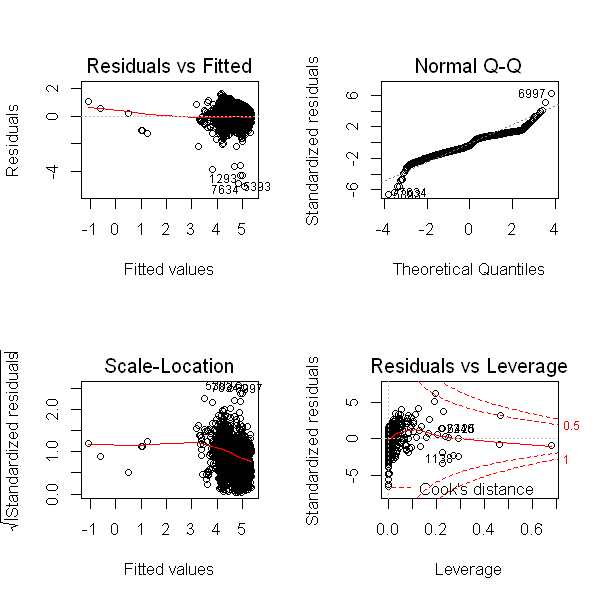

In [370]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit10)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: cauda do lado esquerdo e direita afastada, parte central mais ou menos ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [371]:
AIC(fit4, fit6,fit9,fit10)

Warning message in AIC.default(fit4, fit6, fit9, fit10):
"models are not all fitted to the same number of observations"

,df,AIC
fit4,19,9443.316
fit6,15,10270.818
fit9,19,9637.238
fit10,19,4934.398


O modelo fit10 é o melhor.

In [372]:
# peso 5


resi1 <- fit2$residuals
varfunc.ols <- lm((resi1^2) ~ ., data = amostra_dados2)
varfunc1 <- (varfunc.ols$fitted.values)

fit11 <- lm(log(price) ~ poly(calculated_host_listings_count, degree=3)
           + number_of_reviews_ltm 
           + poly(room_type_codigo, degree=3) 
           + neighbourhood_code + availability_365 + poly(latitude, degree=2) + 
             poly(longitude, degree=3) + minimum_nights + poly(minimum_nights, degree=3)
           , data=amostra_dados2, weights = 1/sqrt(varfunc1))


summary(fit11)
AIC(fit11)

Warning message in sqrt(varfunc1):
"NaNs produced"


Call:
lm(formula = log(price) ~ poly(calculated_host_listings_count, 
    degree = 3) + number_of_reviews_ltm + poly(room_type_codigo, 
    degree = 3) + neighbourhood_code + availability_365 + poly(latitude, 
    degree = 2) + poly(longitude, degree = 3) + minimum_nights + 
    poly(minimum_nights, degree = 3), data = amostra_dados2, 
    weights = 1/sqrt(varfunc1))

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.05375 -0.01422  0.02375  0.05454  0.16776 

Coefficients: (1 not defined because of singularities)
                                                    Estimate Std. Error t value
(Intercept)                                        4.446e+00  2.073e-02 214.499
poly(calculated_host_listings_count, degree = 3)1 -4.474e+00  5.133e-01  -8.716
poly(calculated_host_listings_count, degree = 3)2 -1.217e+01  4.856e-01 -25.059
poly(calculated_host_listings_count, degree = 3)3 -5.827e-01  4.794e-01  -1.215
number_of_reviews_ltm                             -5.490e-04

[1] 7458.91

Todas as variáveis são estatísticamente significativas, menos as variáveis calculated_host_listings_count de grau 3, neighbourhood_code e minimum_nights de grau 1. Temos um R^2 moderado de 53.20%. Logo, 53.20% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [373]:
summary(fit11)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.445669e+00,2.072582e-02,214.4990632,0.000000e+00
"poly(calculated_host_listings_count, degree = 3)1",-4.474149e+00,5.133189e-01,-8.7161188,3.609713e-18
"poly(calculated_host_listings_count, degree = 3)2",-1.216747e+01,4.855558e-01,-25.0588411,2.291381e-132
"poly(calculated_host_listings_count, degree = 3)3",-5.826574e-01,4.793830e-01,-1.2154320,2.242455e-01
number_of_reviews_ltm,-5.489820e-04,2.149438e-04,-2.5540717,1.066976e-02
"poly(room_type_codigo, degree = 3)1",-2.711281e+01,4.023740e-01,-67.3821084,0.000000e+00
"poly(room_type_codigo, degree = 3)2",-3.654137e+00,3.821235e-01,-9.5627139,1.588854e-21
"poly(room_type_codigo, degree = 3)3",1.331608e+00,6.360544e-01,2.0935439,3.633931e-02
neighbourhood_code,-6.629174e-03,7.110110e-03,-0.9323588,3.511858e-01
availability_365,9.334626e-04,4.665124e-05,20.0093853,1.762690e-86


In [374]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit11$residuals)  # média nula
bptest(fit11)   # variância constante
bgtest(fit11)   # ausência de correlação
jarque.bera.test(fit11$residuals)   # distribuição normal


[1] 0.1987679


	studentized Breusch-Pagan test

data:  fit11
BP = 375.04, df = 17, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit11
LM test = 51.827, df = 1, p-value = 6.062e-13



	Jarque Bera Test

data:  fit11$residuals
X-squared = 298.7, df = 2, p-value < 2.2e-16


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos dependentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (resíduos não são normalmente distribuídos)

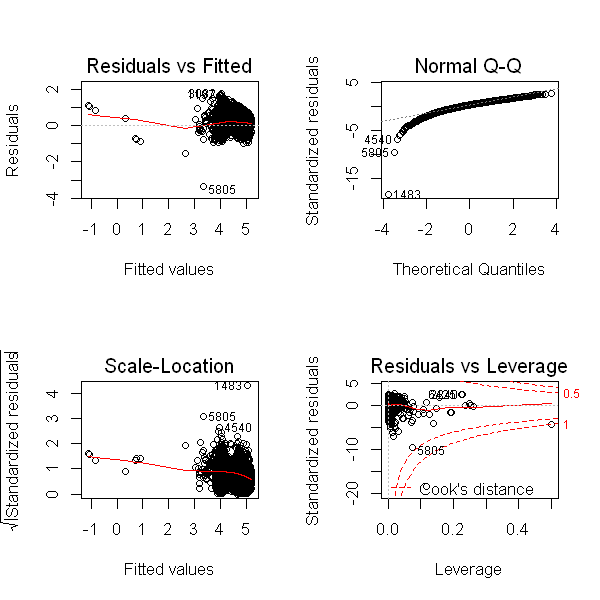

In [375]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit11)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: cauda do lado esquerdo afastada, parte central bem ajustada
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [376]:
AIC(fit4, fit10, fit11)

Warning message in AIC.default(fit4, fit10, fit11):
"models are not all fitted to the same number of observations"

,df,AIC
fit4,19,9443.316
fit10,19,4934.398
fit11,19,7458.910


O modelo fit10 continua a ser o melhor.

In [377]:
# definir uma subamostra usando o indice das linhas/observações
amostra_dados3<-amostra_dados2[1:1000,]

In [378]:
fit12 <- lm(log(price) ~ poly(calculated_host_listings_count, degree=3)
           + number_of_reviews_ltm  + poly(room_type_codigo, degree=2) + neighbourhood_code + availability_365 
            + poly(latitude, degree=2)  + poly(longitude, degree=3) + poly(minimum_nights, degree=3)
           , data=amostra_dados3)

summary(fit12)


Call:
lm(formula = log(price) ~ poly(calculated_host_listings_count, 
    degree = 3) + number_of_reviews_ltm + poly(room_type_codigo, 
    degree = 2) + neighbourhood_code + availability_365 + poly(latitude, 
    degree = 2) + poly(longitude, degree = 3) + poly(minimum_nights, 
    degree = 3), data = amostra_dados3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18867 -0.27417 -0.02341  0.27550  1.39511 

Coefficients:
                                                    Estimate Std. Error t value
(Intercept)                                        4.554e+00  5.515e-02  82.576
poly(calculated_host_listings_count, degree = 3)1  1.868e+00  4.252e-01   4.393
poly(calculated_host_listings_count, degree = 3)2 -1.005e+00  4.247e-01  -2.366
poly(calculated_host_listings_count, degree = 3)3 -6.204e-01  4.252e-01  -1.459
number_of_reviews_ltm                             -2.190e-03  5.405e-04  -4.053
poly(room_type_codigo, degree = 2)1               -1.124e+01  4.403e-01 -25.537


Todas as variáveis são estatísticamente significativas (p-value<0.05), menos as variáveis calculated_host_listings_count de grau 3, room_type_codigo de grau 2, latitude de grau 1, longitude de grau 1 e 2 e neighbourhood_code   (p-value>0.05). Temos um R^2 moderado de 47.17%. Logo, 47.17% da variação dos preços dos Airbnbs está explicada pelos preditores (variáveis independentes) do modelo. Os erros residuais baixos. O modelo é globalmente adequado, considerando o valor da estatística F.

In [379]:
summary(fit12)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.554472e+00,0.0551548615,82.5760730,0.000000e+00
"poly(calculated_host_listings_count, degree = 3)1",1.867817e+00,0.4251782198,4.3930215,1.239189e-05
"poly(calculated_host_listings_count, degree = 3)2",-1.005053e+00,0.4247335514,-2.3663146,1.815926e-02
"poly(calculated_host_listings_count, degree = 3)3",-6.204250e-01,0.4251628928,-1.4592643,1.448119e-01
number_of_reviews_ltm,-2.190350e-03,0.0005404734,-4.0526504,5.463739e-05
"poly(room_type_codigo, degree = 2)1",-1.124341e+01,0.4402819383,-25.5368513,9.627287e-111
"poly(room_type_codigo, degree = 2)2",-4.838420e-01,0.4171885471,-1.1597682,2.464248e-01
neighbourhood_code,1.788265e-02,0.0181746408,0.9839344,3.253899e-01
availability_365,7.510429e-04,0.0001341941,5.5966913,2.833062e-08
"poly(latitude, degree = 2)1",-4.360720e-01,0.6169993030,-0.7067626,4.798815e-01


In [380]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit12$residuals)  # média nula
bptest(fit12)   # variância constante
bgtest(fit12)   # ausência de correlação
jarque.bera.test(fit12$residuals)   # distribuição normal

[1] 1.685989e-18


	studentized Breusch-Pagan test

data:  fit12
BP = 40.199, df = 16, p-value = 0.0007282



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit12
LM test = 0.20876, df = 1, p-value = 0.6477



	Jarque Bera Test

data:  fit12$residuals
X-squared = 1.5268, df = 2, p-value = 0.4661


Análise dos resultados:
- **Média nula**: verificado
- Os resíduos tem a **variância constante** (homocedásticos) - teste de Breusch-Pagan (H0: erros homocedásticos): 
p-value < 0.05, rejeitamos a H0, logo o pressuposto não é verificado (variância não é constante)
- Os resíduos são independentes (**ausência de correlação**)- teste de Breusch-Godfrey (H0:resíduos independentes):
p-value > 0.05, não rejeitamos a H0, logo o pressuposto é verificado (resíduos independentes)
- Os resíduos são **normalmente distribuídos**-Teste de Jarque-Bera (H0: distribuição normal):
p-value > 0.05, não rejeitamos a H0, logo o pressuposto é verificado (resíduos são normalmente distribuídos)

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

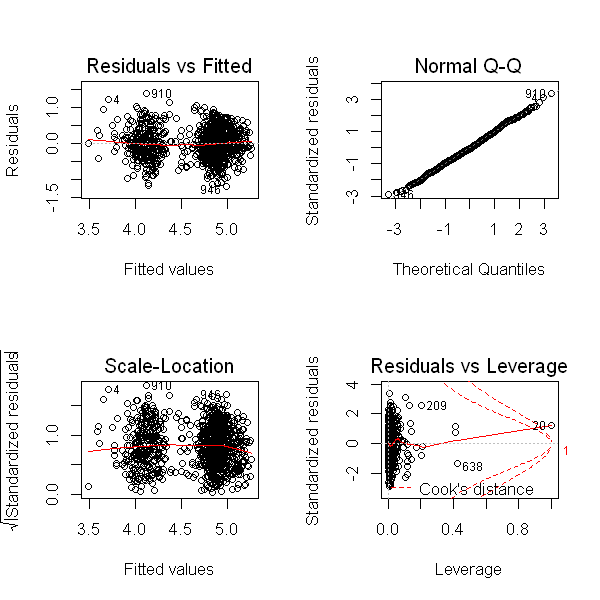

In [381]:
# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(2,2)) 
plot(fit12)

Avaliação visual:
- **Residuals vs Fitted**: nuvem de pontos sob reta horizontal, tem alguma não linearidade
- **Normal Q-Q**: caudas e centro bem ajustado
- **Scale-Location**: sem funil
- **Residuals vs Leverage**: resíduos/ outliers, tenho valores afastados, temos outliers na base de  dados

In [382]:
AIC(fit4, fit10, fit12)

Warning message in AIC.default(fit4, fit10, fit12):
"models are not all fitted to the same number of observations"

,df,AIC
fit4,19,9443.316
fit10,19,4934.398
fit12,18,1096.974


O modelo fit12 é o com melhor AIC.

In [383]:
AIC(fit, fit2, fit3, fit4, fit5, fit6, fit7, fit8, fit9, fit10, fit11, fit12)

Warning message in AIC.default(fit, fit2, fit3, fit4, fit5, fit6, fit7, fit8, fit9, :
"models are not all fitted to the same number of observations"

,df,AIC
fit,10,114574.594
fit2,10,79484.443
fit3,10,10566.466
fit4,19,9443.316
fit5,14,10277.779
fit6,15,10270.818
fit7,19,10503.963
fit8,19,9620.451
fit9,19,9637.238
fit10,19,4934.398


## Previsão e avaliação da performance

[1] 2.512335

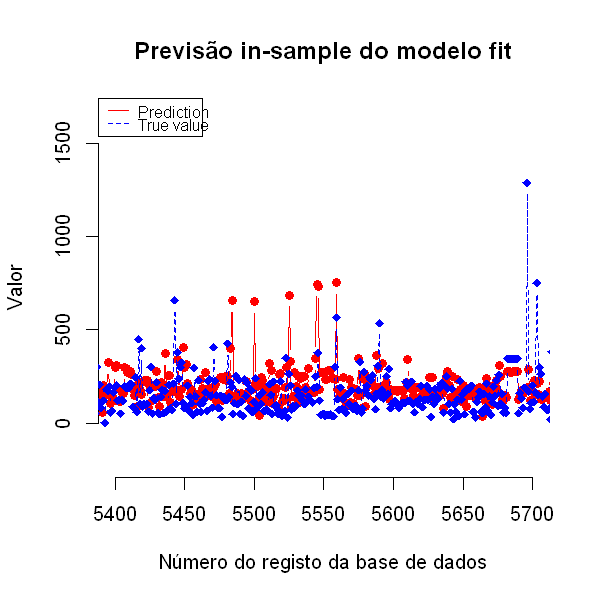

In [384]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE 
pr0 <-predict(fit,amostra_dados)
plot((pr0), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo da base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit", xlim=c(5400,5700))

lines(amostra_dados$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual0<-amostra_dados$price
prediction0 <- (fit$fitted.values)
n<-length(amostra_dados$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE0 <- (1/n) * sum(abs((actual0 - prediction0)/actual0))
MAPE0

[1] 0.7059467

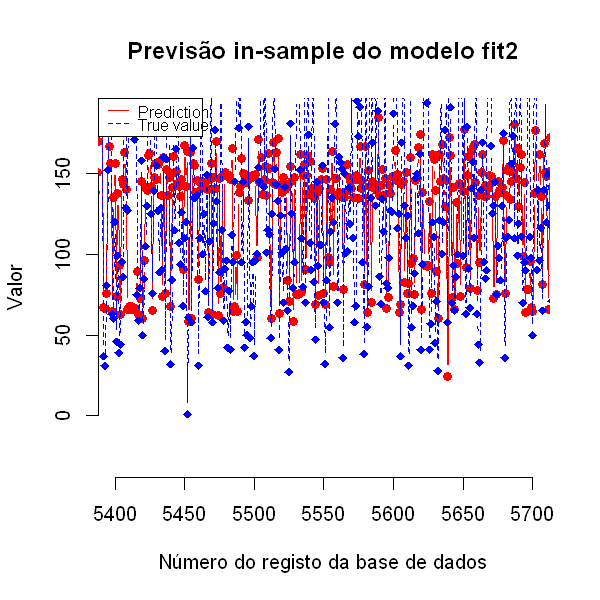

In [385]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE 
pr2 <-predict(fit2,amostra_dados2)
plot((pr2), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo da base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit2",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual2<-amostra_dados2$price
prediction2 <- (fit2$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE2 <- (1/n) * sum(abs((actual2 - prediction2)/actual2))
MAPE2

[1] 0.5125674

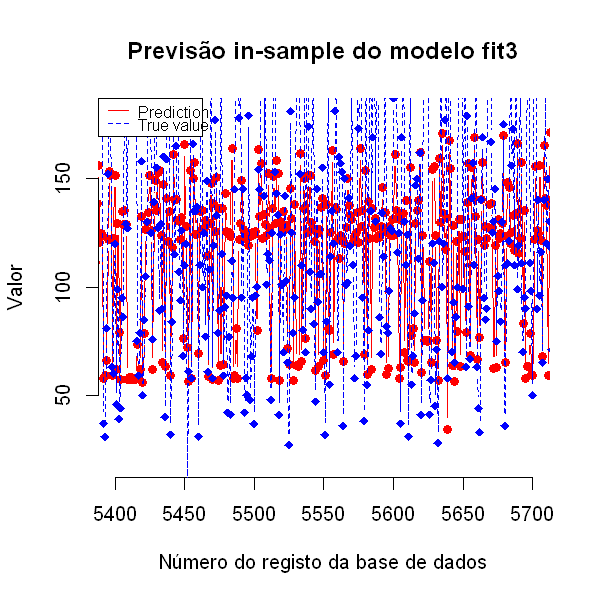

In [386]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE 
pr3 <-predict(fit3,amostra_dados2)
plot(exp(pr3), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo da base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit3",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual3<-amostra_dados2$price
prediction3 <- exp(fit3$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE3 <- (1/n) * sum(abs((actual3 - prediction3)/actual3))
MAPE3

[1] 0.4416521

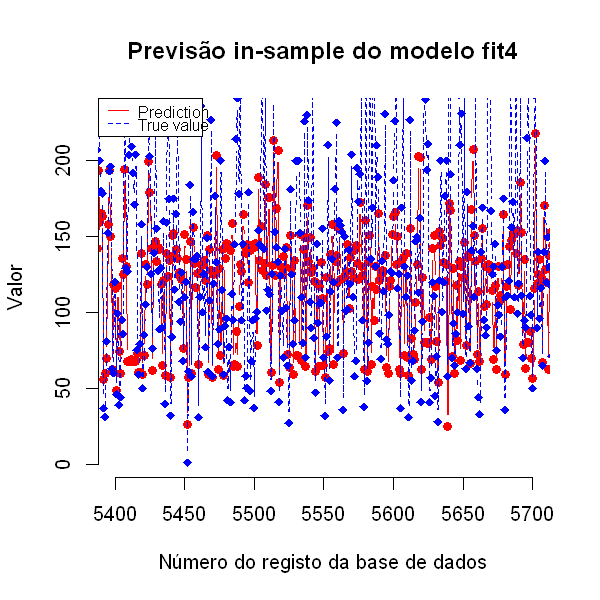

In [387]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr4 <-predict(fit4,amostra_dados2)
plot(exp(pr4), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo da base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit4",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual4<-amostra_dados2$price
prediction4 <- exp(fit4$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE4 <- (1/n) * sum(abs((actual4 - prediction4)/actual4))
MAPE4

[1] 0.4897531

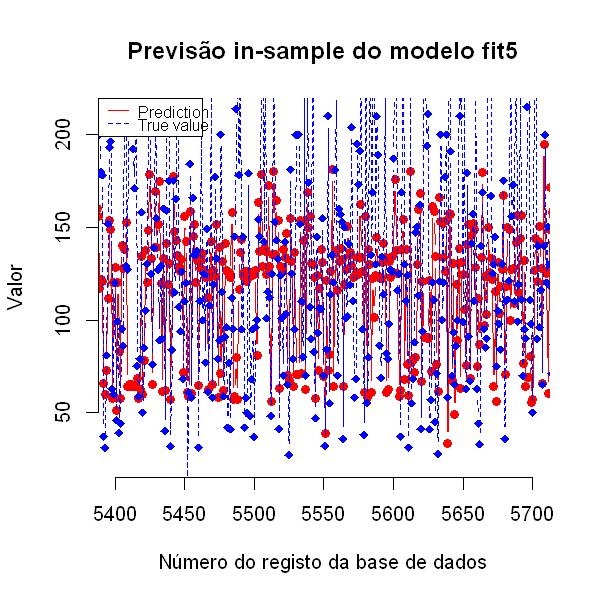

In [388]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE 
pr5 <-predict(fit5,amostra_dados2)
plot(exp(pr5), type = "b", frame = FALSE, pch = 19, col = "red",xlab = "Número do registo da base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit5",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual5<-amostra_dados2$price
prediction5 <- exp(fit5$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE5 <- (1/n) * sum(abs((actual5 - prediction5)/actual5))
MAPE5

[1] 0.4889459

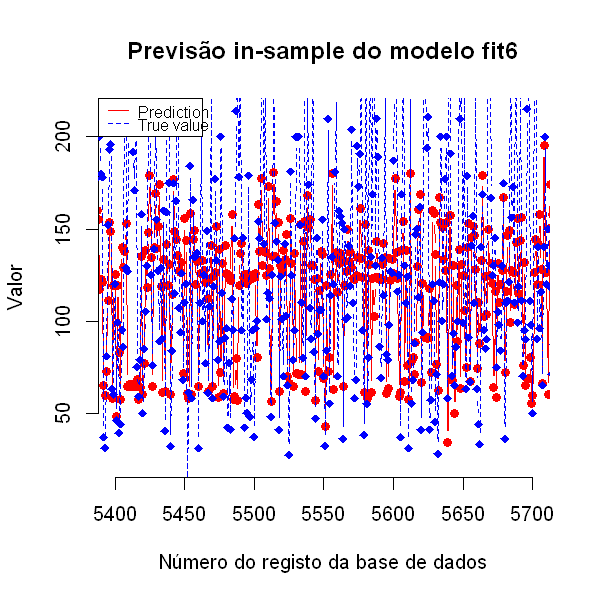

In [389]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr6 <-predict(fit6,amostra_dados2)
plot(exp(pr6), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo da base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit6",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual6<-amostra_dados2$price
prediction6 <- exp(fit6$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE6 <- (1/n) * sum(abs((actual6 - prediction6)/actual6))
MAPE6

[1] 0.4382143

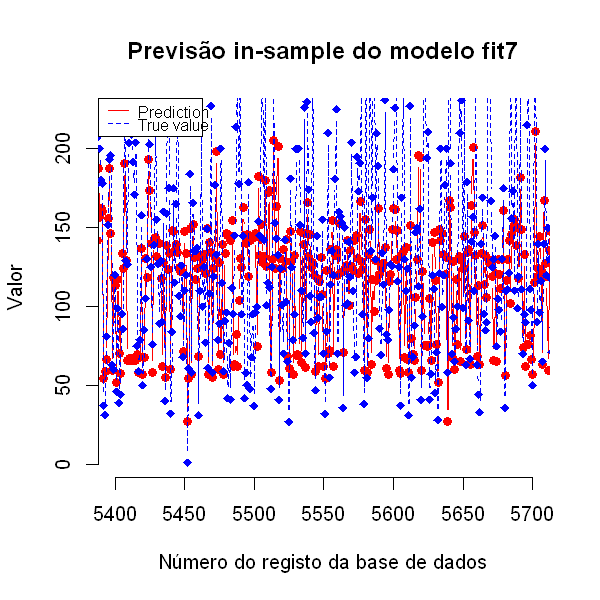

In [390]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE 
pr7 <-predict(fit7,amostra_dados2)
plot(exp(pr7), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo da base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit7",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual7<-amostra_dados2$price
prediction7 <- exp(fit7$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE7 <- (1/n) * sum(abs((actual7 - prediction7)/actual7))
MAPE7

Warning message in actual8 - prediction8:
"longer object length is not a multiple of shorter object length"

[1] 0.5712543

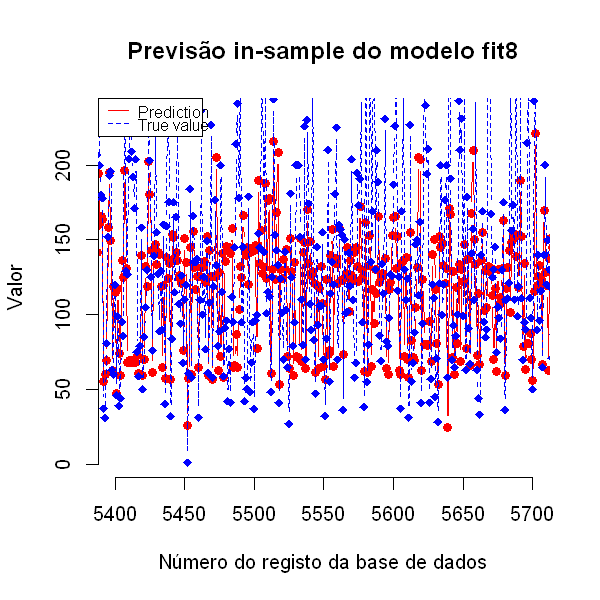

In [391]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr8 <-predict(fit8,amostra_dados2)
plot(exp(pr8), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo da base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit8",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual8<-amostra_dados2$price
prediction8 <- exp(fit8$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE8 <- (1/n) * sum(abs((actual8 - prediction8)/actual8))
MAPE8

Warning message in actual9 - prediction9:
"longer object length is not a multiple of shorter object length"

[1] 0.572166

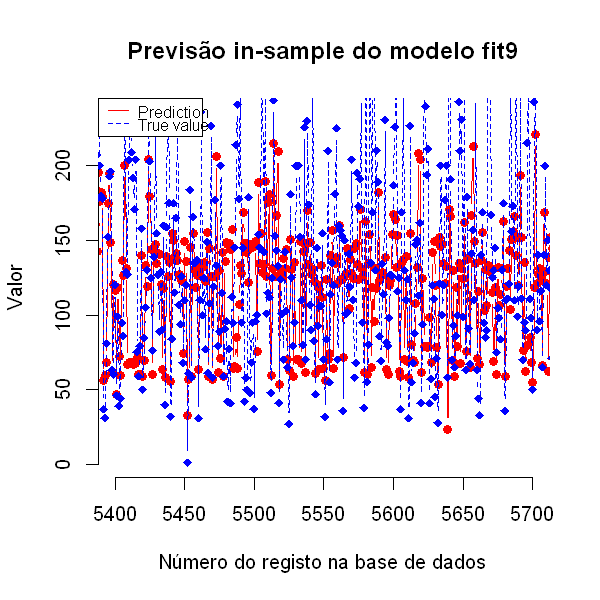

In [392]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE 
pr9 <-predict(fit9,amostra_dados2)
plot(exp(pr9), type = "b", frame = FALSE, pch = 19, col = "red",xlab = "Número do registo na base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit9",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual9<-amostra_dados2$price
prediction9 <- exp(fit9$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE9 <- (1/n) * sum(abs((actual9 - prediction9)/actual9))
MAPE9

[1] 0.4936788

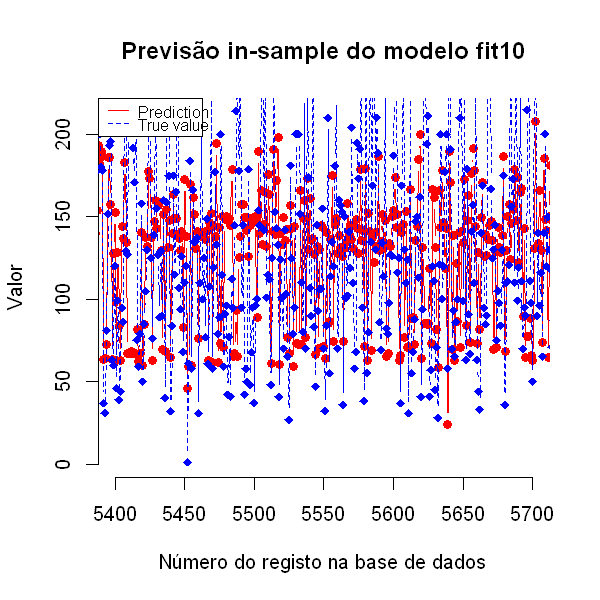

In [393]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr10 <-predict(fit10,amostra_dados2)
plot(exp(pr10), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo na base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit10",xlim=c(5400,5700))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual10<-amostra_dados2$price
prediction10 <- exp(fit10$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE10 <- (1/n) * sum(abs((actual10 - prediction10)/actual10))
MAPE10

Warning message in predict.lm(fit11, amostra_dados2):
"prediction from a rank-deficient fit may be misleading"Warning message in actual11 - prediction11:
"longer object length is not a multiple of shorter object length"

[1] 0.7248554

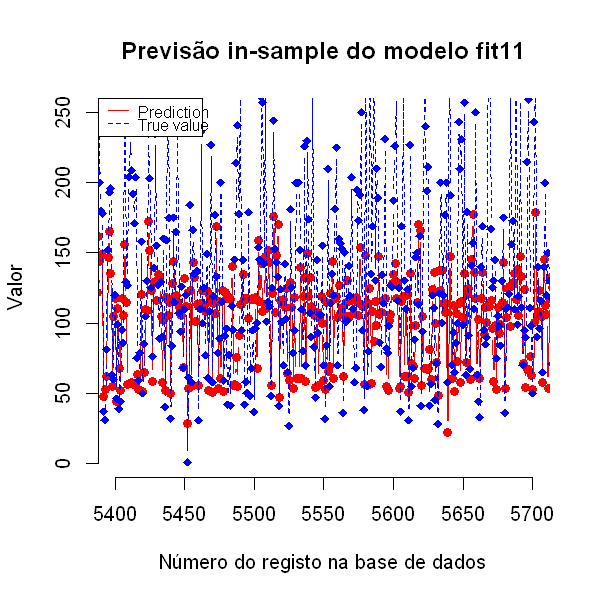

In [394]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE 
pr11 <-predict(fit11,amostra_dados2)
plot(exp(pr11), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo na base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit11",xlim=c(5400,5700), ylim=c(0, 250))

lines(amostra_dados2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(5400,5700), ylim=c(0, 250))

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual11<-amostra_dados2$price
prediction11 <- exp(fit11$fitted.values)
n<-length(amostra_dados2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE11 <- (1/n) * sum(abs((actual11 - prediction11)/actual11))
MAPE11

[1] 0.3430531

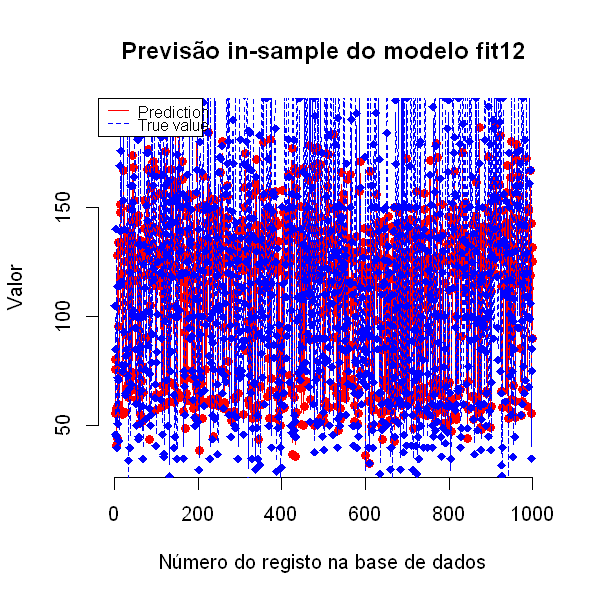

In [395]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE 
pr12 <-predict(fit12,amostra_dados3)
plot(exp(pr12), type = "b", frame = FALSE, pch = 19, col = "red",  xlab = "Número do registo na base de dados",
     ylab = "Valor",main="Previsão in-sample do modelo fit12")

lines(amostra_dados3$price, pch = 18, col = "blue", type = "b", lty = 2)

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual12<-amostra_dados3$price
prediction12 <- exp(fit12$fitted.values)
n<-length(amostra_dados3$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE12 <- (1/n) * sum(abs((actual12 - prediction12)/actual12))
MAPE12

## Resumo dos Resultados

In [396]:
numero_modelo <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
erros <-c(MAPE0,MAPE2,MAPE3,MAPE4,MAPE5,MAPE6,MAPE7,MAPE8,MAPE9,MAPE10,MAPE11, MAPE12)
AICs <-c(AIC(fit),AIC(fit2),AIC(fit3),AIC(fit4),AIC(fit5),AIC(fit6),AIC(fit7),AIC(fit8),AIC(fit9),AIC(fit10), AIC(fit11), AIC(fit12))
R_quadrado <-c(summary(fit)$r.squared, summary(fit2)$r.squared, summary(fit3)$r.squared, summary(fit4)$r.squared, 
               summary(fit5)$r.squared, summary(fit6)$r.squared, summary(fit7)$r.squared, summary(fit8)$r.squared, 
               summary(fit9)$r.squared, summary(fit10)$r.squared, summary(fit11)$r.squared, summary(fit12)$r.squared)
cbind(numero_modelo, erros,AICs,R_quadrado)

numero_modelo,erros,AICs,R_quadrado
1,2.5123347,114574.594,0.09574498
2,0.7059467,79484.443,0.27962478
3,0.5125674,10566.466,0.33300762
4,0.4416521,9443.316,0.42980169
5,0.4897531,10277.779,0.35965073
6,0.4889459,10270.818,0.36043862
7,0.4382143,10503.963,0.43514933
8,0.5712543,9620.451,0.44572571
9,0.5721660,9637.238,NA
10,0.4936788,4934.398,0.89836600


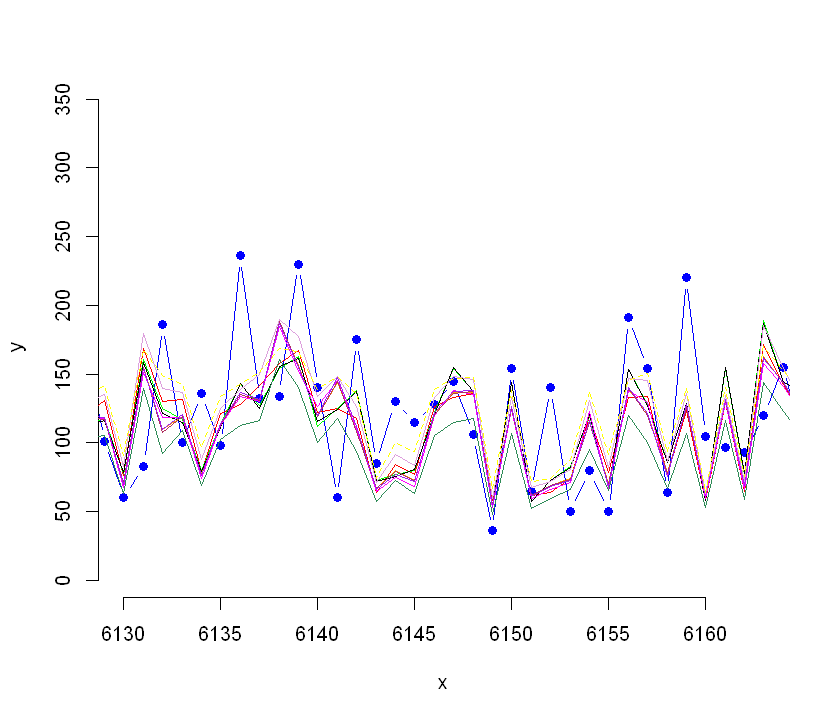

In [397]:
# representação conjunta das previsões dos últimos 33 valores pelo cada modelo considerado

# definir o tamanho da figura
options(repr.plot.width=7, repr.plot.height=6)

plot(amostra_dados2$price, type = "b", frame = FALSE, pch = 19, col = "blue", xlab = "x", ylab = "y", xlim=c(6130,6163))
lines(exp(pr3),  pch = 19, col = "red", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(exp(pr4), pch = 19, col = "orange", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(exp(pr5),  pch = 19, col = "green", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(exp(pr6),  pch = 19, col = "black", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(exp(pr7),  pch = 19, col = "magenta", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(exp(pr8),  pch = 19, col = "maroon", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(exp(pr9),  pch = 19, col = "purple", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(exp(pr10), pch = 19, col = "plum", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(exp(pr11), pch = 19, col = "seagreen", xlab = "x", ylab = "y",xlim=c(6130,6163))
lines(pr2, pch = 18, col = "yellow", lty = 2,xlim=c(6130,6163))

# Conjunto de treino e de teste

Para conseguirmos saber se o modelo de regressão fit4 consegue prever de forma correta fora da amostra, ou seja out-sample, dividimos a amostra em dois conjuntos, o conjunto de treino, com 90% dos dados e o conjunto de teste com 10% dos dados. Deste modo, treinamos a regressão sobre o conjunto de treino, sendo que o modelo não sabe os valores do conjunto de teste. 
Vamos prever k valores out-of-sample, sendo k o número de elementos do conjunto de teste, usando o modelo de regressão treinado sobre o conjunto de treino. Os valores preditos são depois comparados com os valores verdadeiros do conjunto de teste, calculando o MAPE. Este valor vai ilustrar a verdadeira capacidade de generalização/previsão out-of-sample do modelo de regressão.

In [398]:
library(caTools)

In [399]:
# usamos a biblioteca "caTools" para fazer o split (divisão) da amostra em conjunto de treino e teste
set.seed(127)

separar = sample.split(amostra_dados2, SplitRatio = 0.90)

train = amostra_dados2[separar,]

test = amostra_dados2[!(separar),]

In [400]:
# verificar o número de observações de cada conjunto
nrow(train)
nrow(test)

[1] 6066

[1] 1212

In [401]:
# correr o modelo fit4 sobre o conjunto de treino

fit4_n <- lm(log(price) ~ calculated_host_listings_count + I(calculated_host_listings_count^2) 
           + I(calculated_host_listings_count^3)
           + number_of_reviews_ltm 
           + room_type_codigo +   I(room_type_codigo^2) +  I(room_type_codigo^3) 
           + neighbourhood_code + availability_365 + latitude +I(latitude^2) +
             longitude + I(longitude^2) +  I(longitude^3) + minimum_nights + I(minimum_nights^2) + I(minimum_nights^3)
           , data=train)

[1] 0.3843636

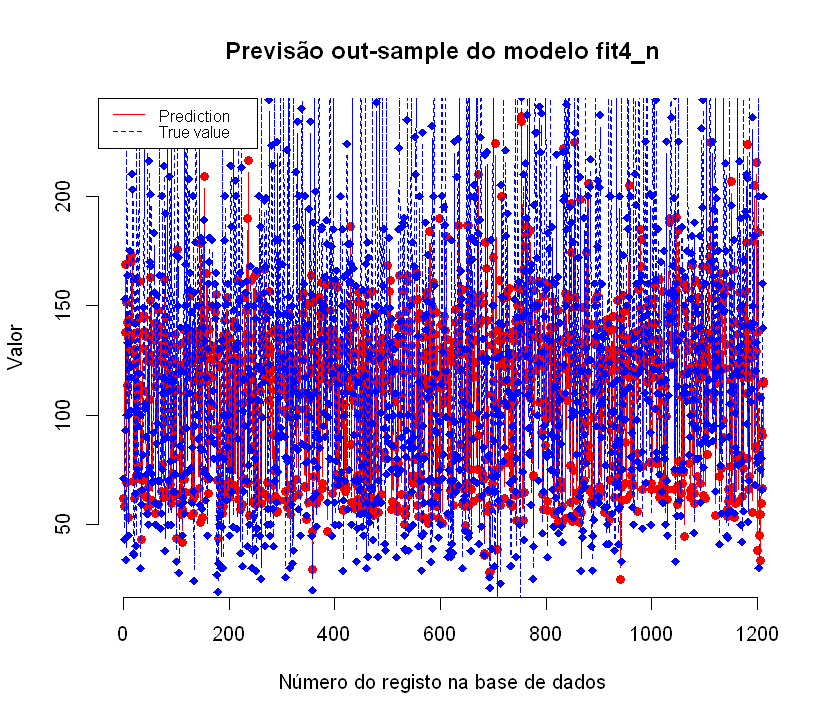

In [402]:
# previsão usando o modelo fit4_n sobre o conjunto de teste

pr4_n <-predict(fit4_n,test)
plot(exp(pr4_n), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "Número do registo na base de dados", ylab = "Valor", 
     main="Previsão out-sample do modelo fit4_n")

lines(test$price, pch = 18, col = "blue", type = "b", lty = 2)

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual4_n<-test$price
#prediction<-exp(pr)
prediction4_n <- exp(pr4_n)
n<-length(test$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE4_n <- (1/n) * sum(abs((actual4_n - prediction4_n)/actual4_n))
MAPE4_n

# Subamostra conjunto de treino e teste

Para conseguirmos saber se o modelo de regressão fit12 consegue prever de forma correta fora da amostra, ou seja out-sample, dividimos a amostra em dois conjuntos, o conjunto de treino, com 90% dos dados e o conjunto de teste com 10% dos dados. Deste modo, treinamos a regressão sobre o conjunto de treino, sendo que o modelo não sabe os valores do conjunto de teste. 
Vamos prever k valores out-of-sample, sendo k o número de elementos do conjunto de teste, usando o modelo de regressão treinado sobre o conjunto de treino. Os valores preditos são depois comparados com os valores verdadeiros do conjunto de teste, calculando o MAPE. Este valor vai ilustrar a verdadeira capacidade de generalização/previsão out-of-sample do modelo de regressão.

In [403]:
library(caTools)

In [416]:
# usamos a biblioteca "caTools" para fazer o split (divisão) da amostra em conjunto de treino e teste
set.seed(2)

separar = sample.split(amostra_dados3, SplitRatio = 0.90)

train1 = amostra_dados3[separar,]

test1 = amostra_dados3[!(separar),]

In [417]:
# verificar o número de observações de cada conjunto
nrow(train1)
nrow(test1)

[1] 834

[1] 166

In [418]:
fit12_n <- lm(log(price) ~ poly(calculated_host_listings_count, degree=3)
           + number_of_reviews_ltm 
           + poly(room_type_codigo, degree=2) 
           + neighbourhood_code + availability_365 + poly(latitude, degree=2)  +
             poly(longitude, degree=3) + poly(minimum_nights, degree=3)
           , data=train1)

[1] 0.3167233

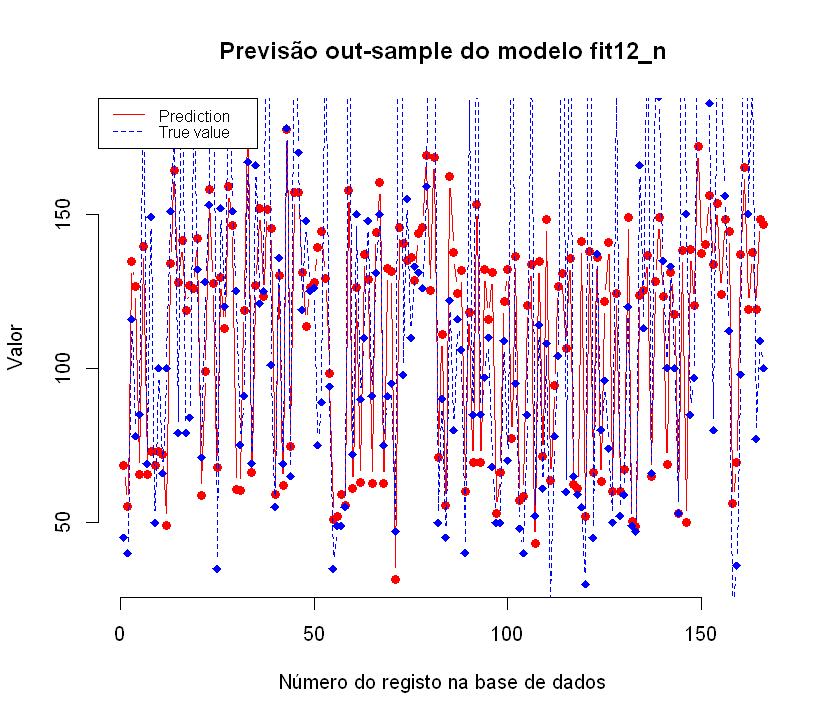

In [419]:
# previsão usando o modelo fit4_n sobre o conjunto de teste

pr12_n <-predict(fit12_n,test1)
plot(exp(pr12_n), type = "b", frame = FALSE, pch = 19, col = "red", 
     xlab = "Número do registo na base de dados", ylab = "Valor", 
     main="Previsão out-sample do modelo fit12_n")

lines(test1$price, pch = 18, col = "blue", type = "b", lty = 2)

legend("topleft", legend=c("Prediction", "True value"), col=c("red", "blue"), lty = 1:2, cex=0.8)

# erro de previsão

actual12_n<-test1$price
#prediction<-exp(pr)
prediction12_n <- exp(pr12_n)
n<-length(test1$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE12_n <- (1/n) * sum(abs((actual12_n - prediction12_n)/actual12_n))
MAPE12_n

Podemos concluir que os modelos fit4, fit12 e os seus derivados criados especificamente para se testar as capacidades de previsão out-sample. fit4_n e fit12_n, respetivamente, têm boa capacidade de previsão in-sample e out-sample, pois obtivemos valores de MAPE de 38.43% (fit4_n) e 44.16% (fit4) e 34.30% (fit12) e 31.67% (fit12_n). Como os erros in-sample e out-sample são muito parecidos, nada dá a entender que tenhamos overfitting ou underfitting. 